In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

sys.path.append(parent_dir)

from config import input_columns, output_columns

print("Input columns:", input_columns)
print("Output columns:", output_columns)

Input columns: ['height', 'weight', 'age', 'form']
Output columns: ['shoulder', 'long_sleeve', 'sleeve', 'biceps', 'armhole', 'neck', 'chest', 'waist', 'stomach', 'hip', 'pants_length', 'thight', 'crotch']


# RAW DATA

- Fetched API to get data from T4T server then merged them into 1 file

In [3]:
df = pd.read_csv(Path(r"..\..\data\raw\__merged_raw_data.csv").resolve())

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55929 entries, 0 to 55928
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   height        55929 non-null  object
 1   weight        55929 non-null  object
 2   age           55929 non-null  object
 3   form          55917 non-null  object
 4   shoulder      55929 non-null  object
 5   long_sleeve   55917 non-null  object
 6   sleeve        55929 non-null  object
 7   biceps        55917 non-null  object
 8   armhole       55917 non-null  object
 9   neck          55929 non-null  object
 10  chest         55929 non-null  object
 11  waist         55929 non-null  object
 12  stomach       55929 non-null  object
 13  hip           55920 non-null  object
 14  pants_length  55917 non-null  object
 15  thight        55917 non-null  object
 16  crotch        55920 non-null  object
dtypes: object(17)
memory usage: 7.3+ MB


In [5]:
df.describe()

,height,weight,age,form,shoulder,long_sleeve,sleeve,biceps,armhole,neck,chest,waist,stomach,hip,pants_length,thight,crotch
count,55929,55929,55929,55917,55929,55917,55929,55917,55917,55929,55929,55929,55929,55920,55917,55917,55920
unique,57,92,39,5,112,158,142,198,164,133,218,237,278,137,213,453,498
top,"170,00","65,00","19,00",Triangle,"46,00","71,00","60,00","33,00","45,00","41,00","98,00","84,00","84,00","96,00","94,00","58,00","61,50"
freq,6916,3458,6675,17651,5159,3294,5609,4068,4460,7294,3197,2278,2400,3757,4719,3943,3220


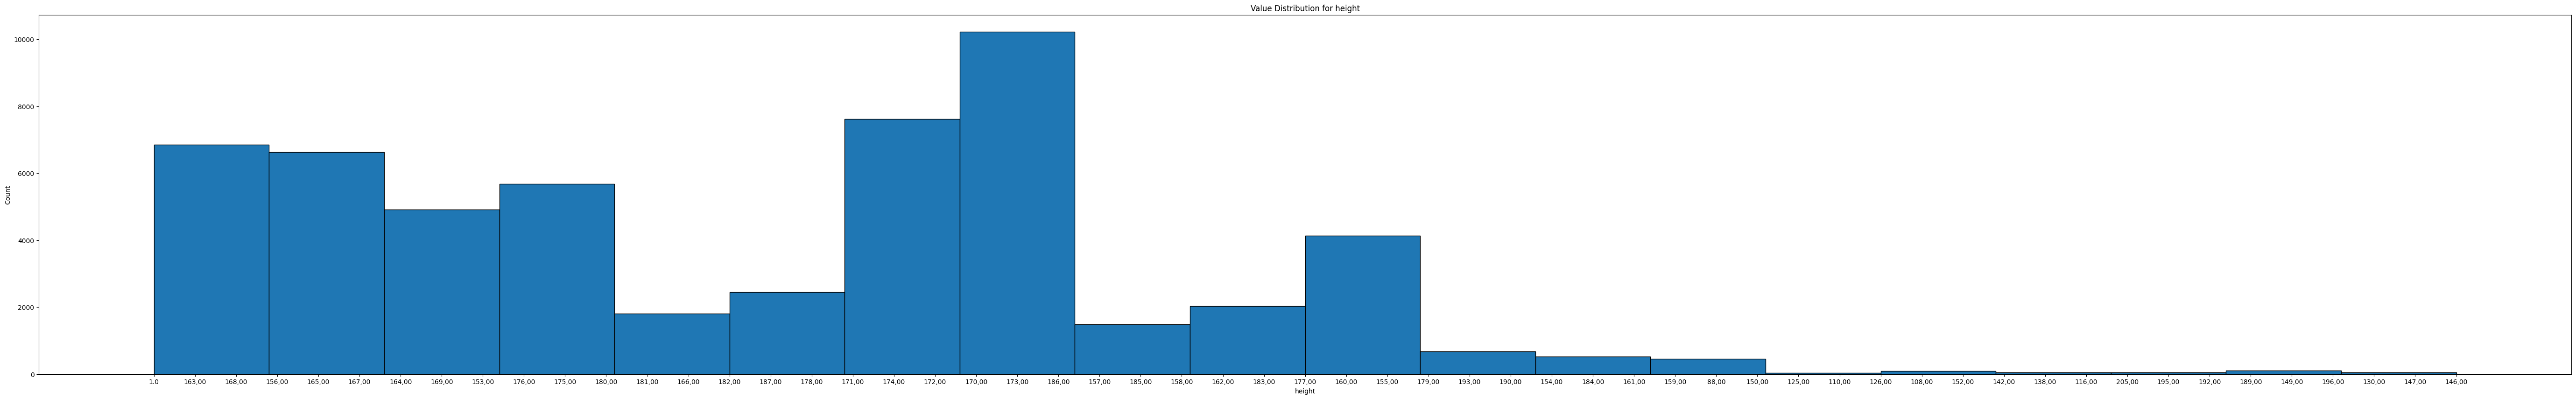

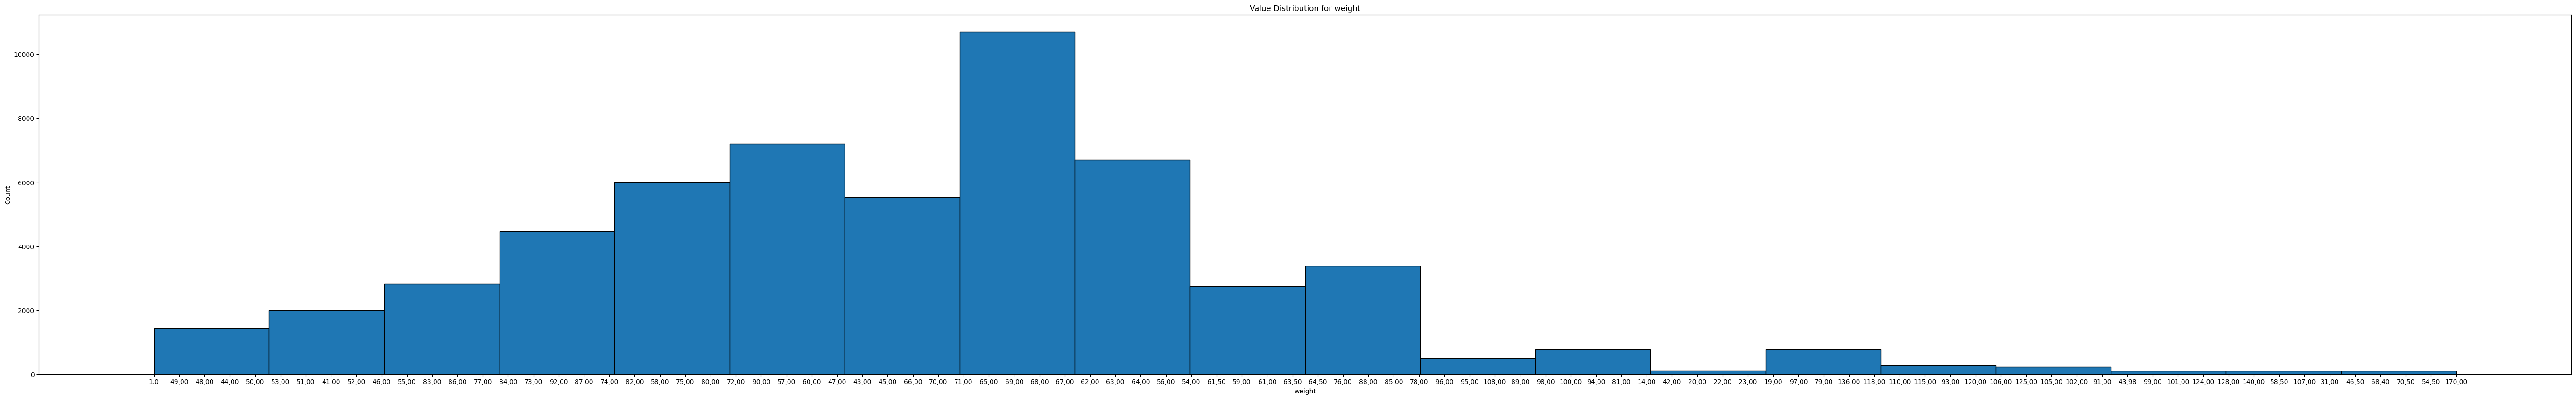

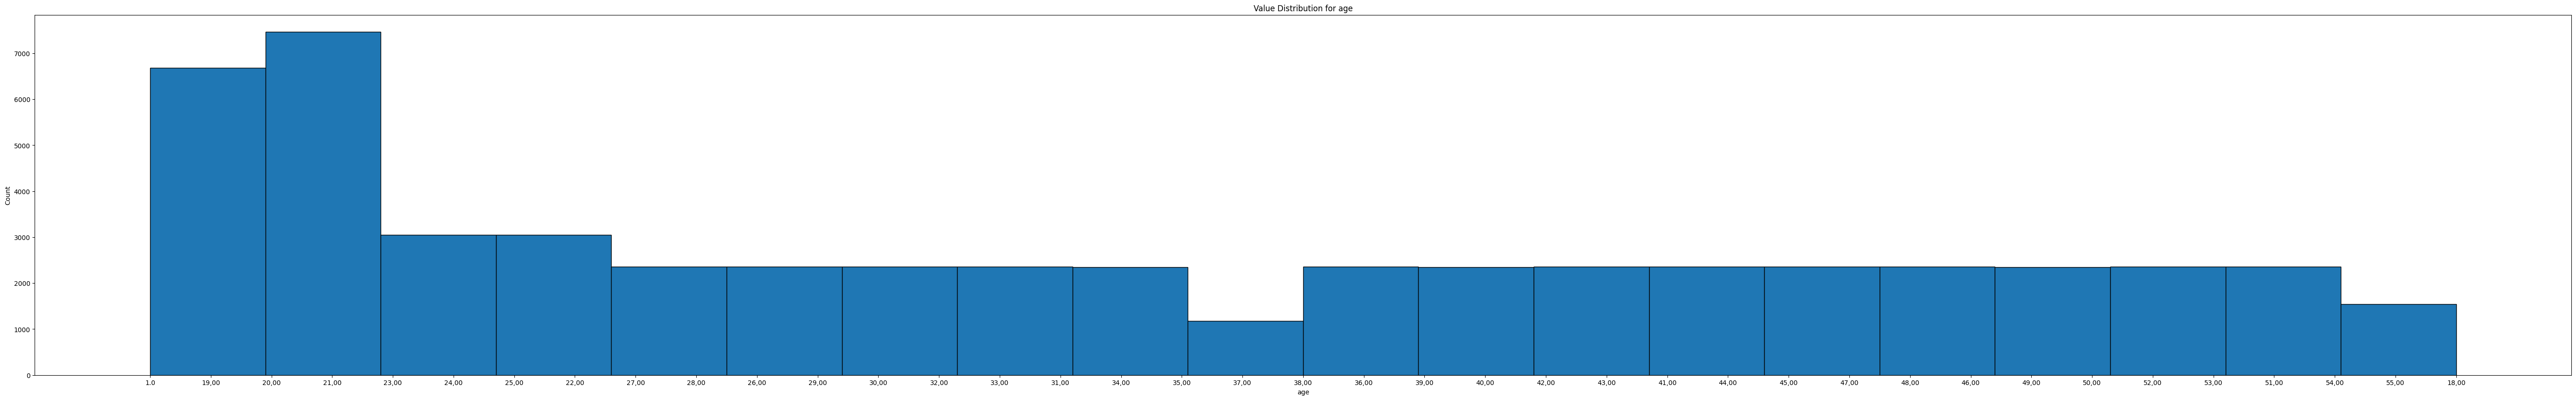

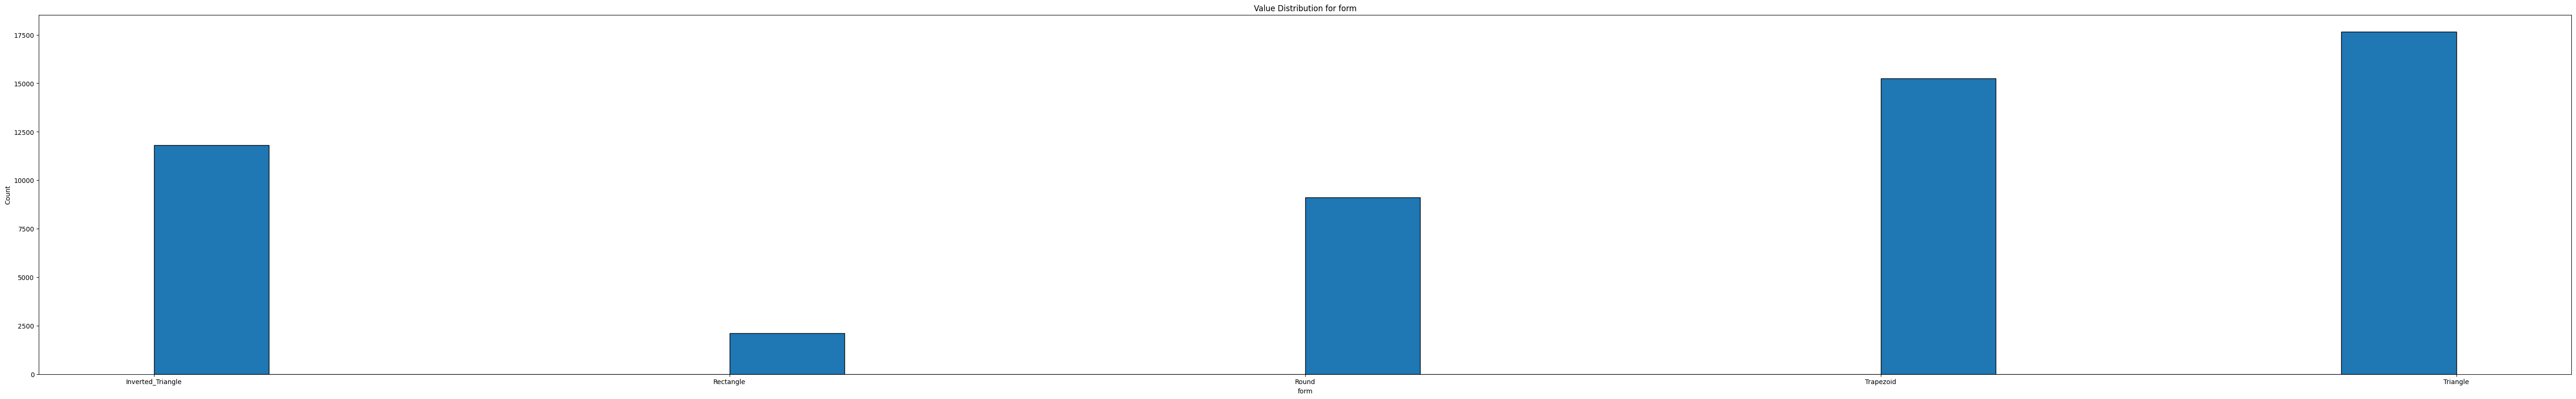

In [6]:
labels = input_columns

# Vẽ histogram cho từng cột
for label in labels:
    fig, ax = plt.subplots(figsize=(70, 10))
    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=20, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

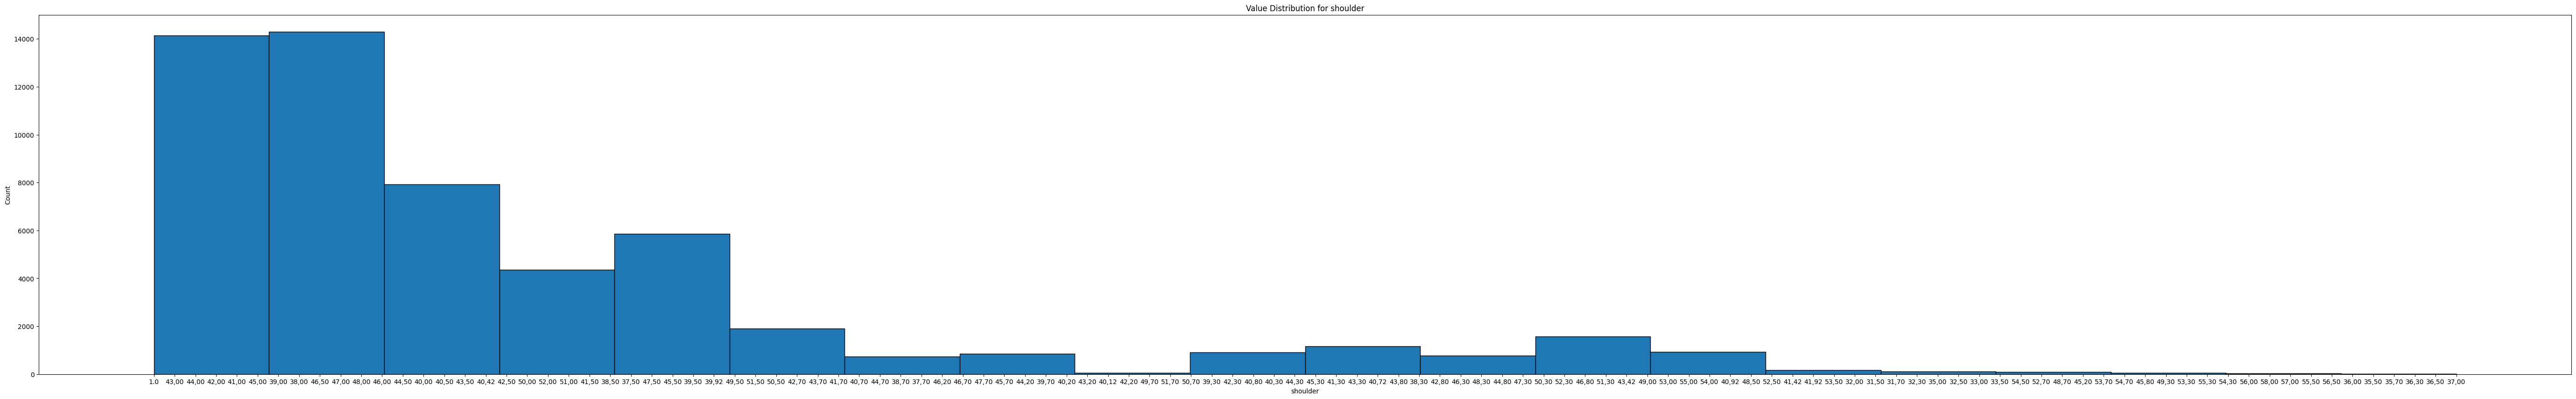

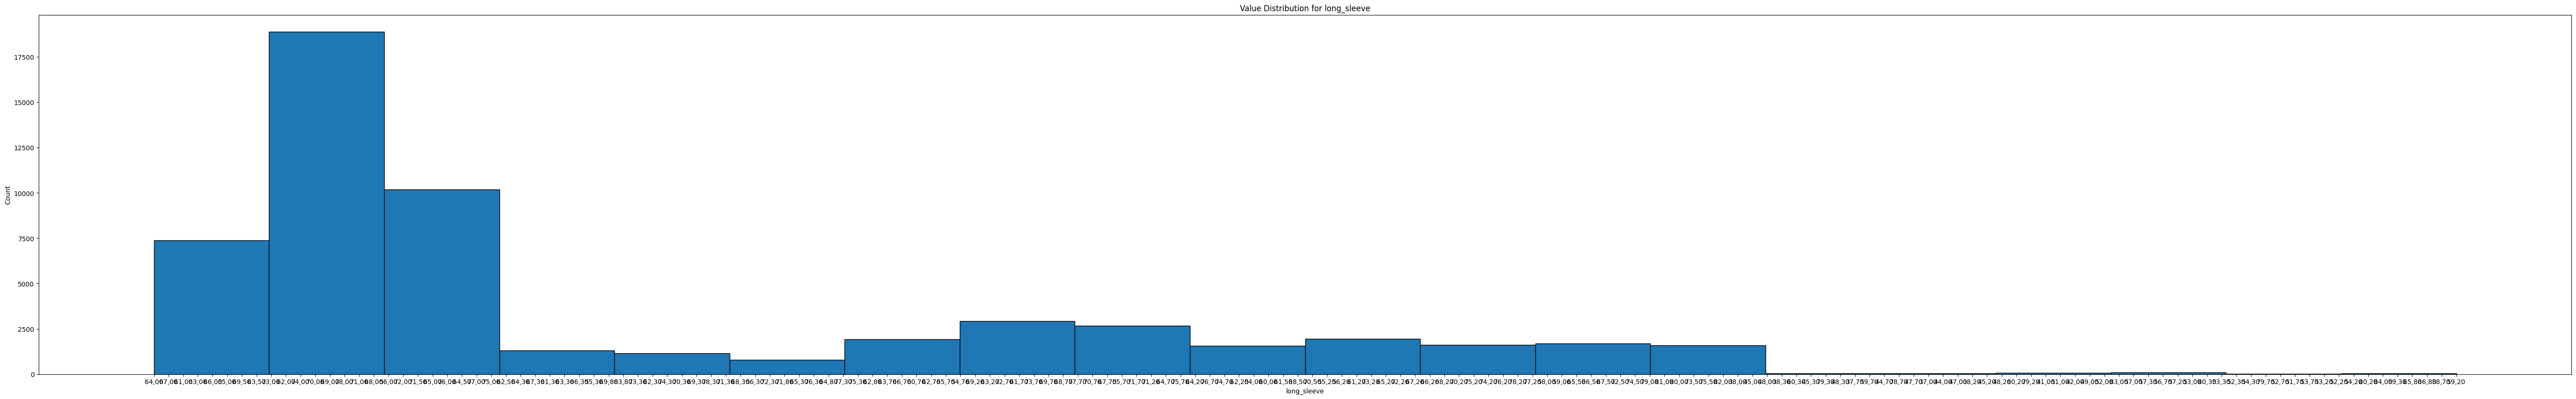

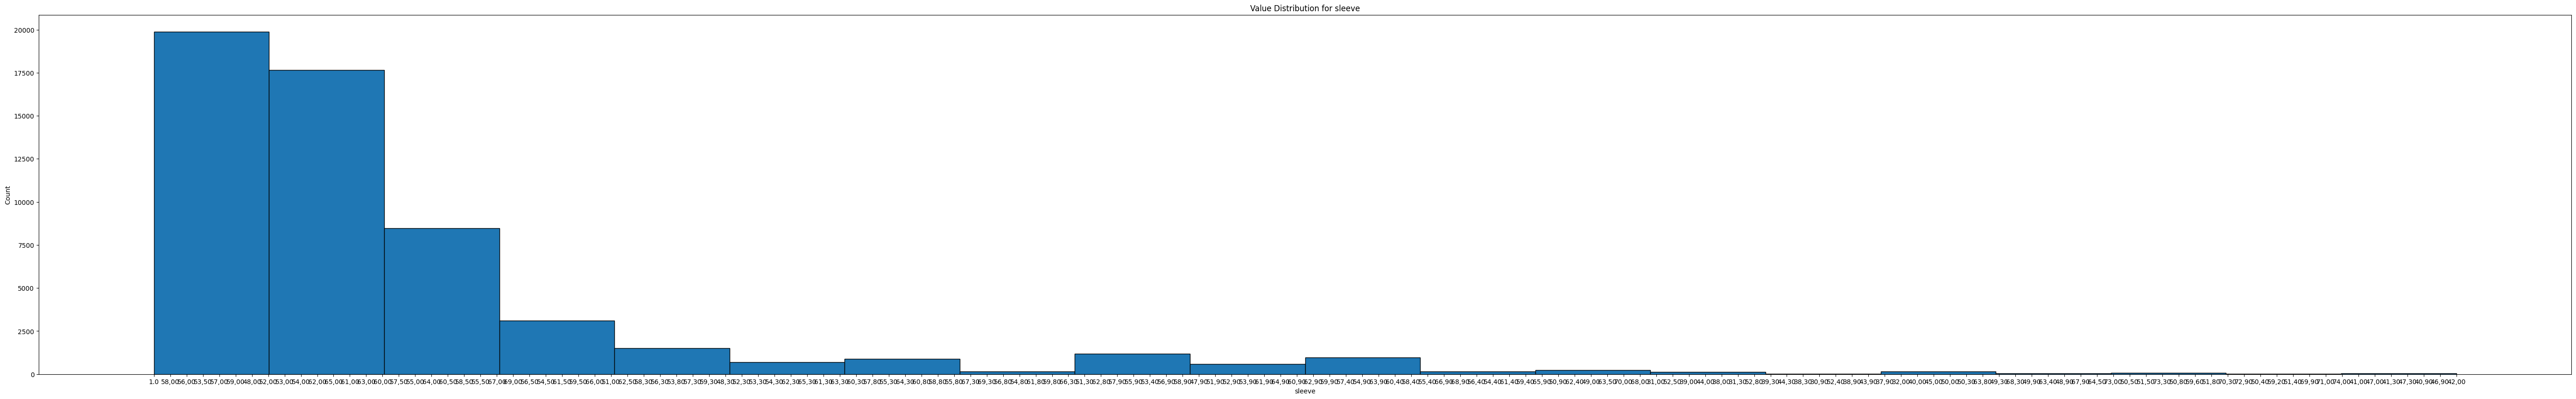

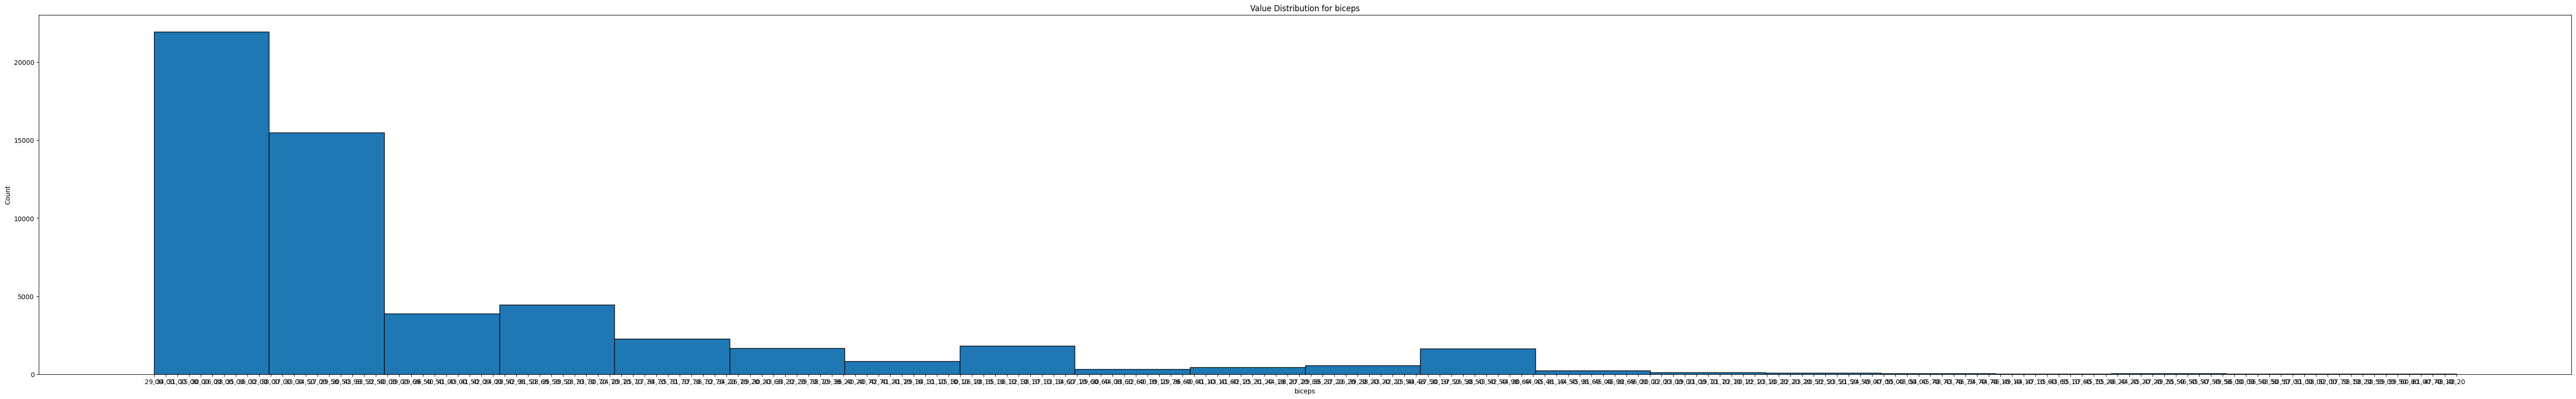

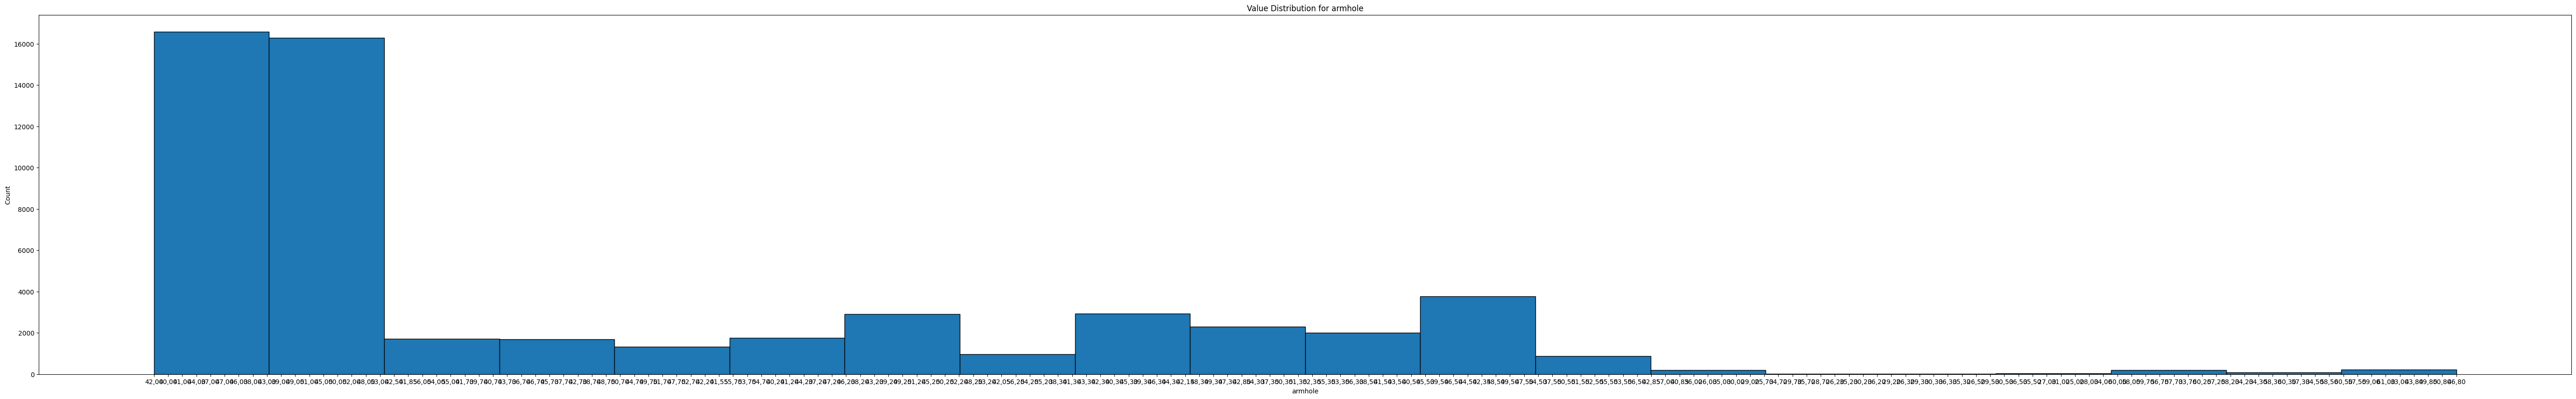

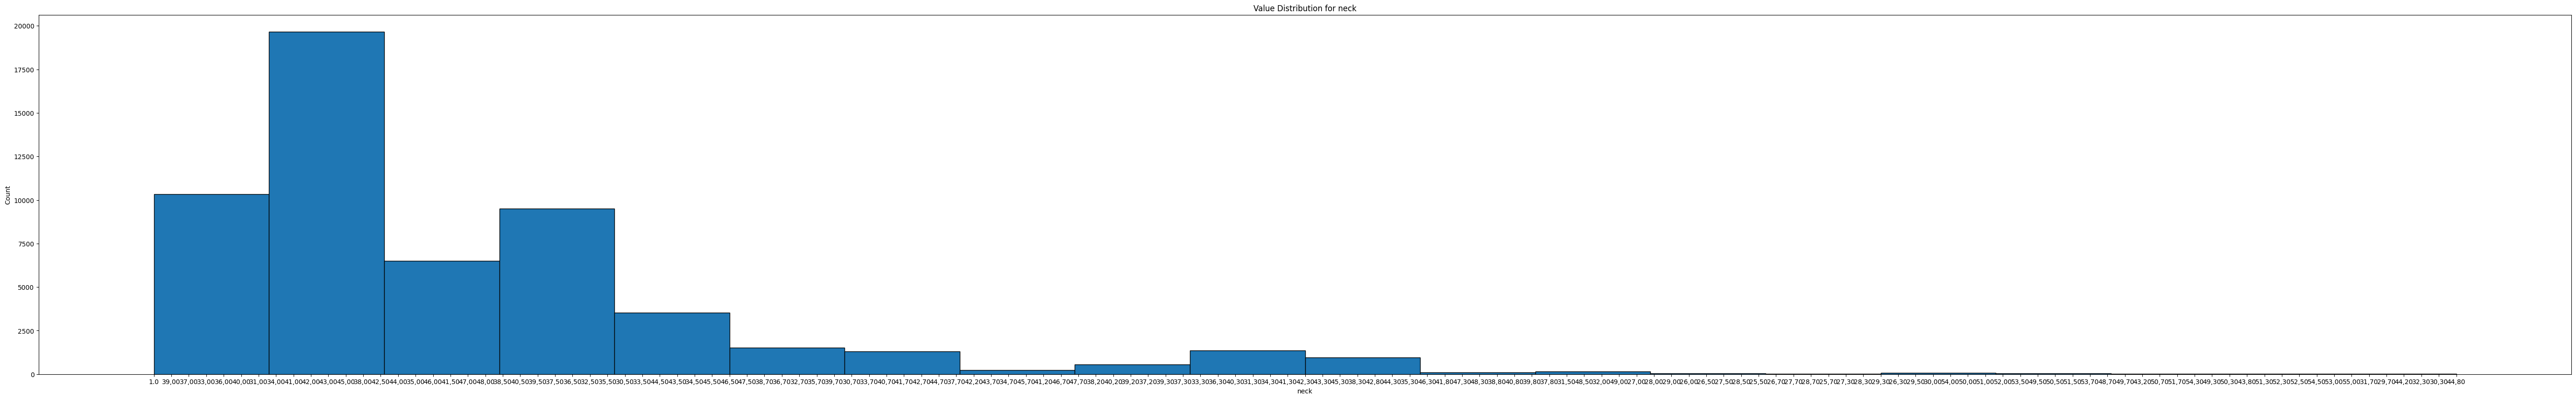

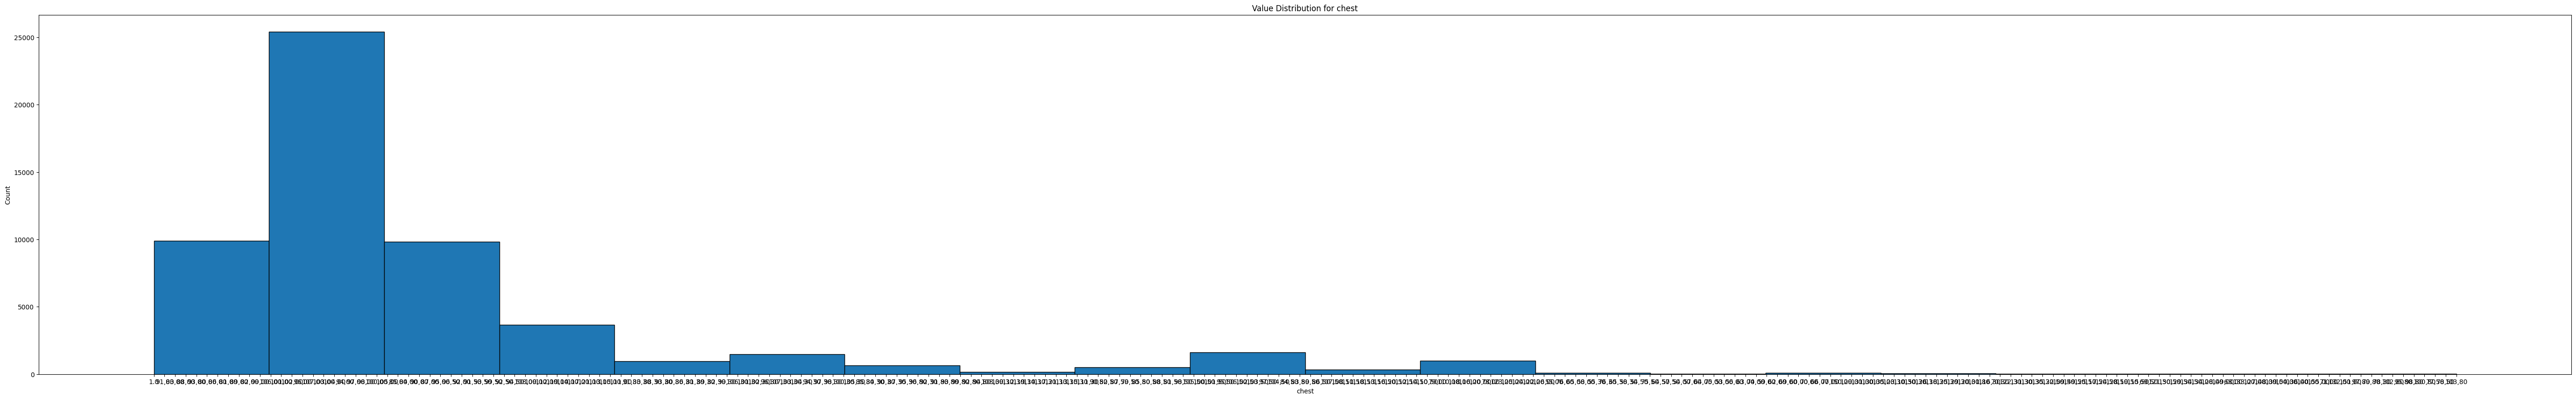

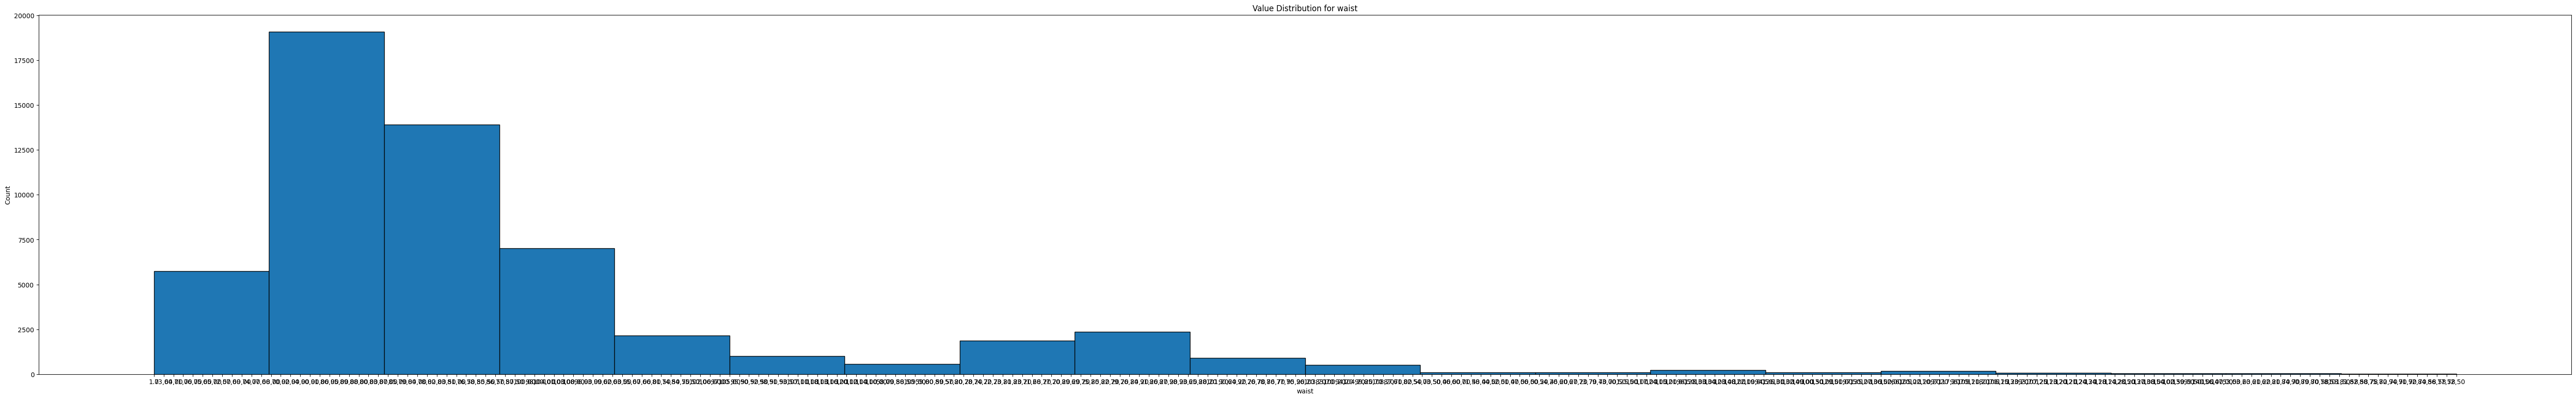

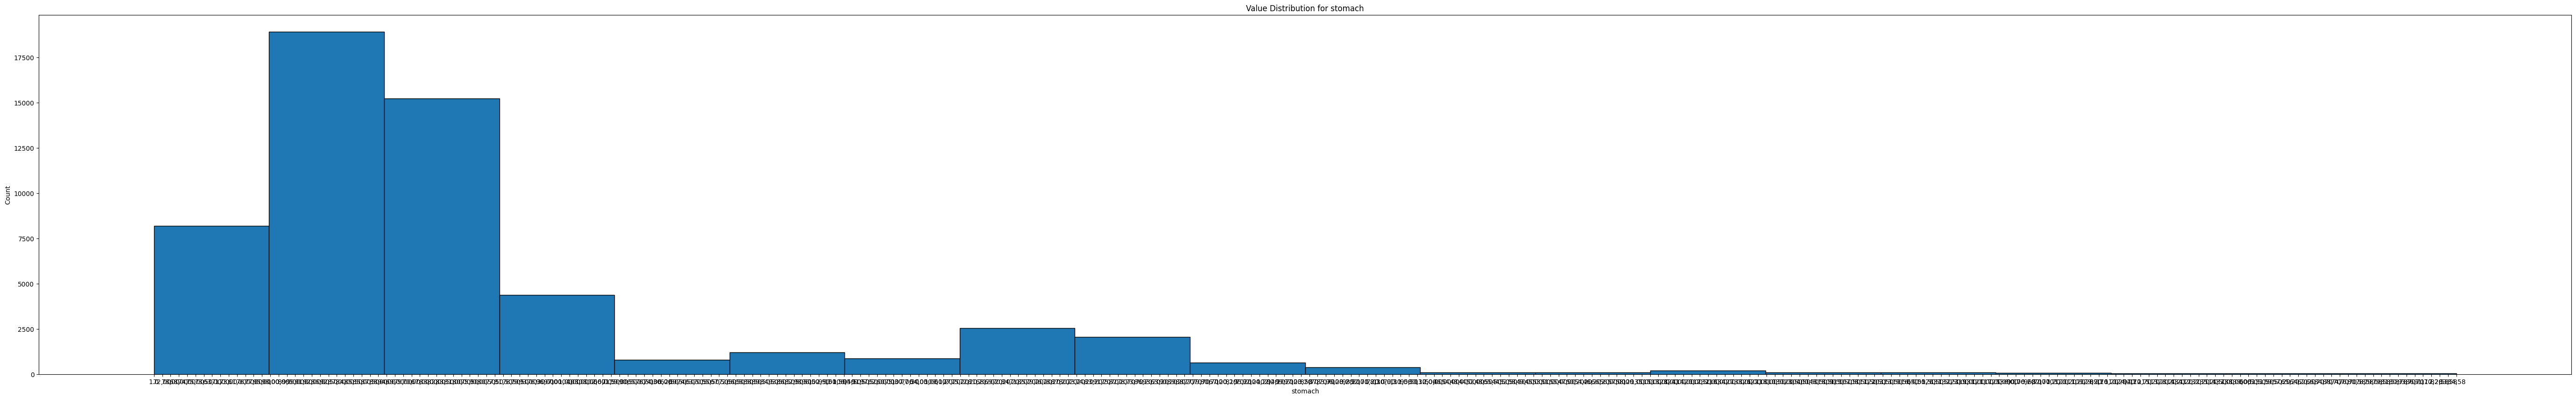

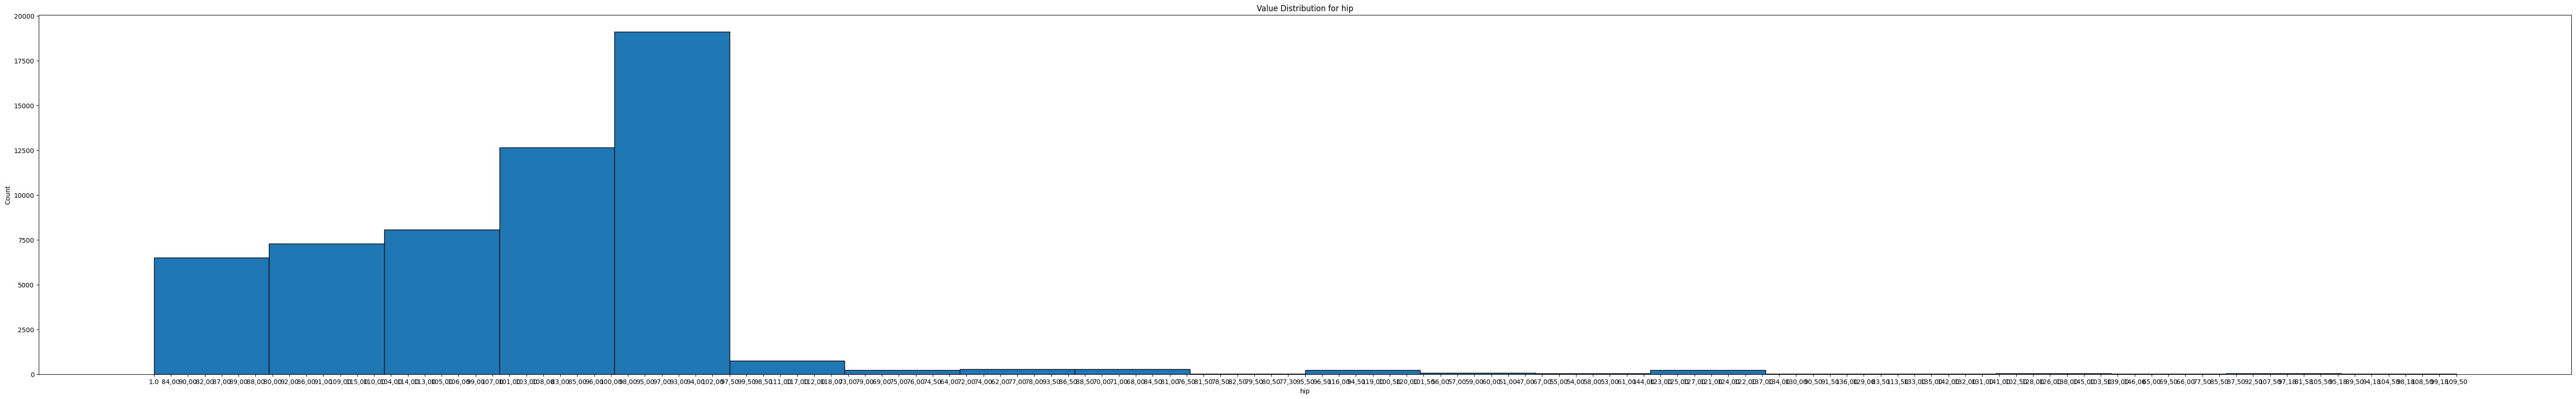

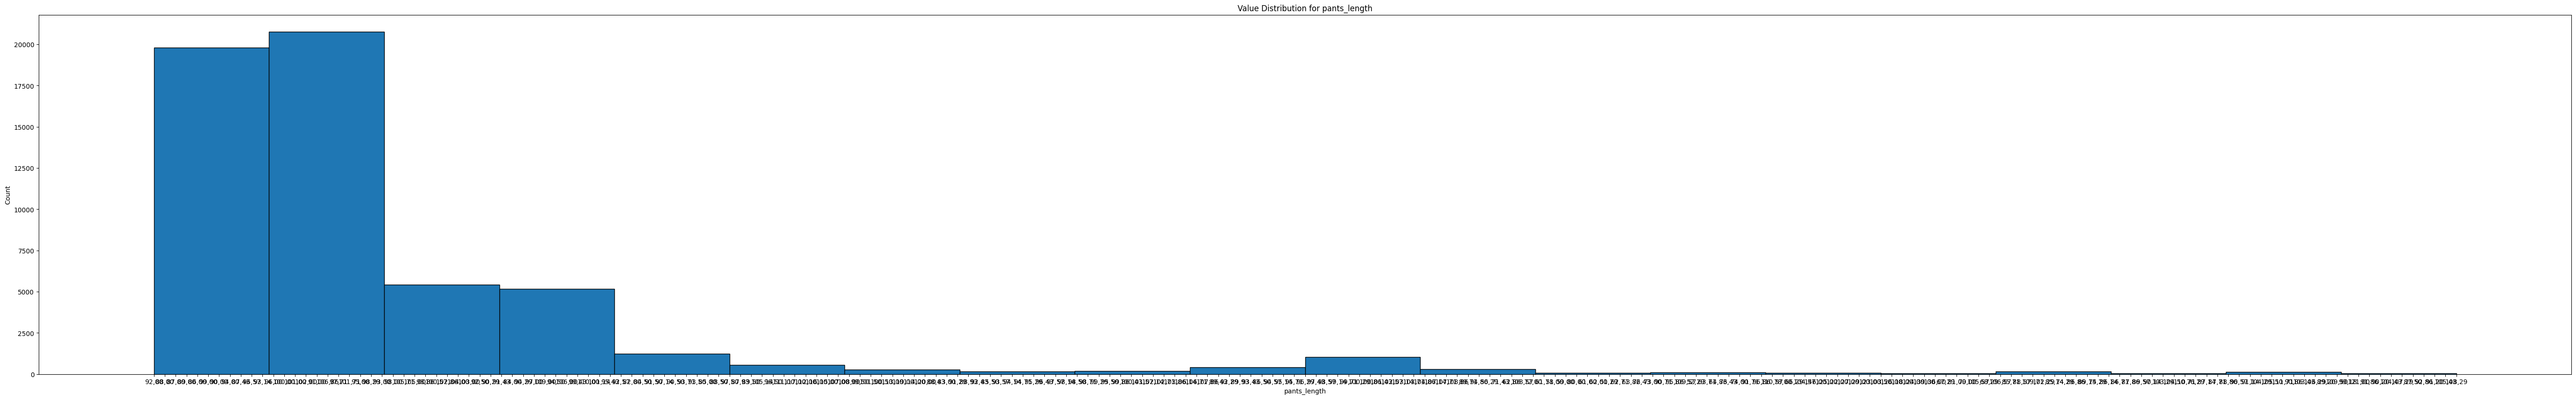

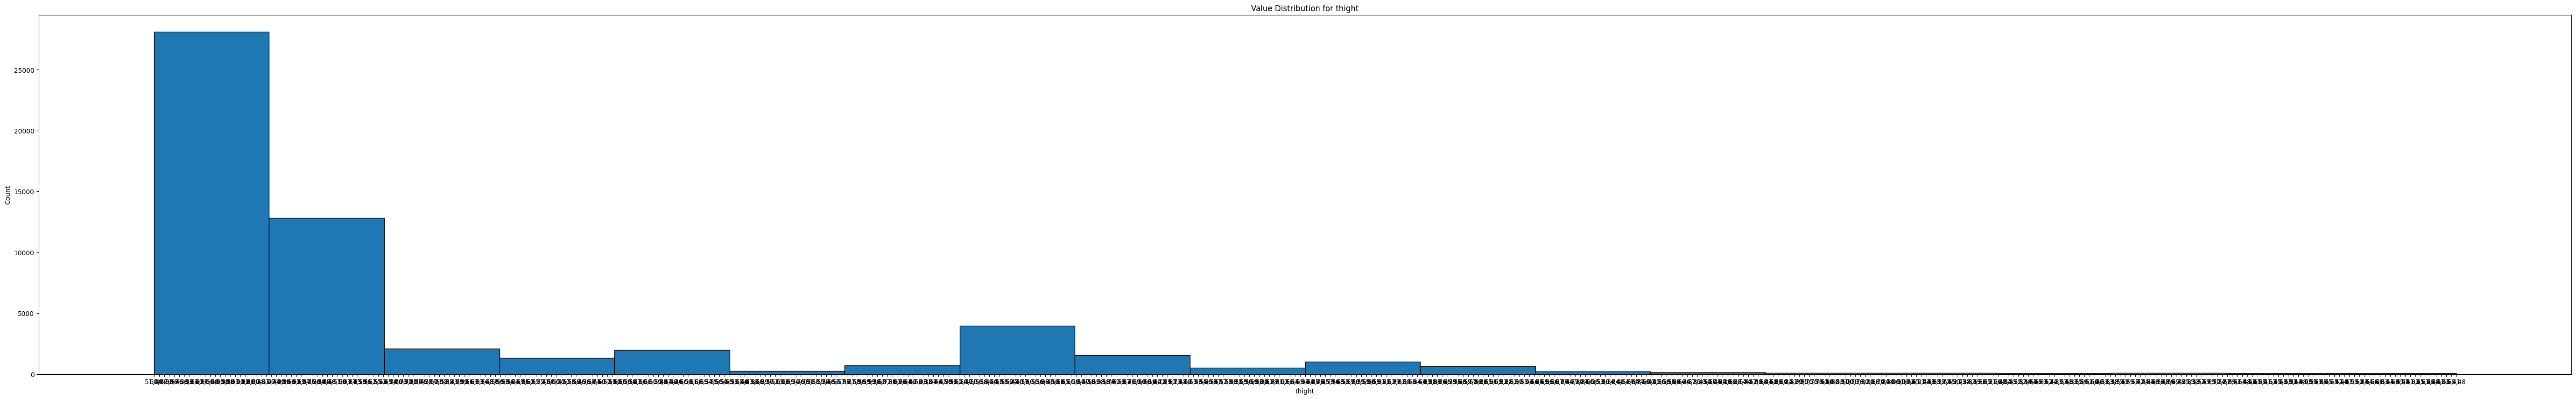

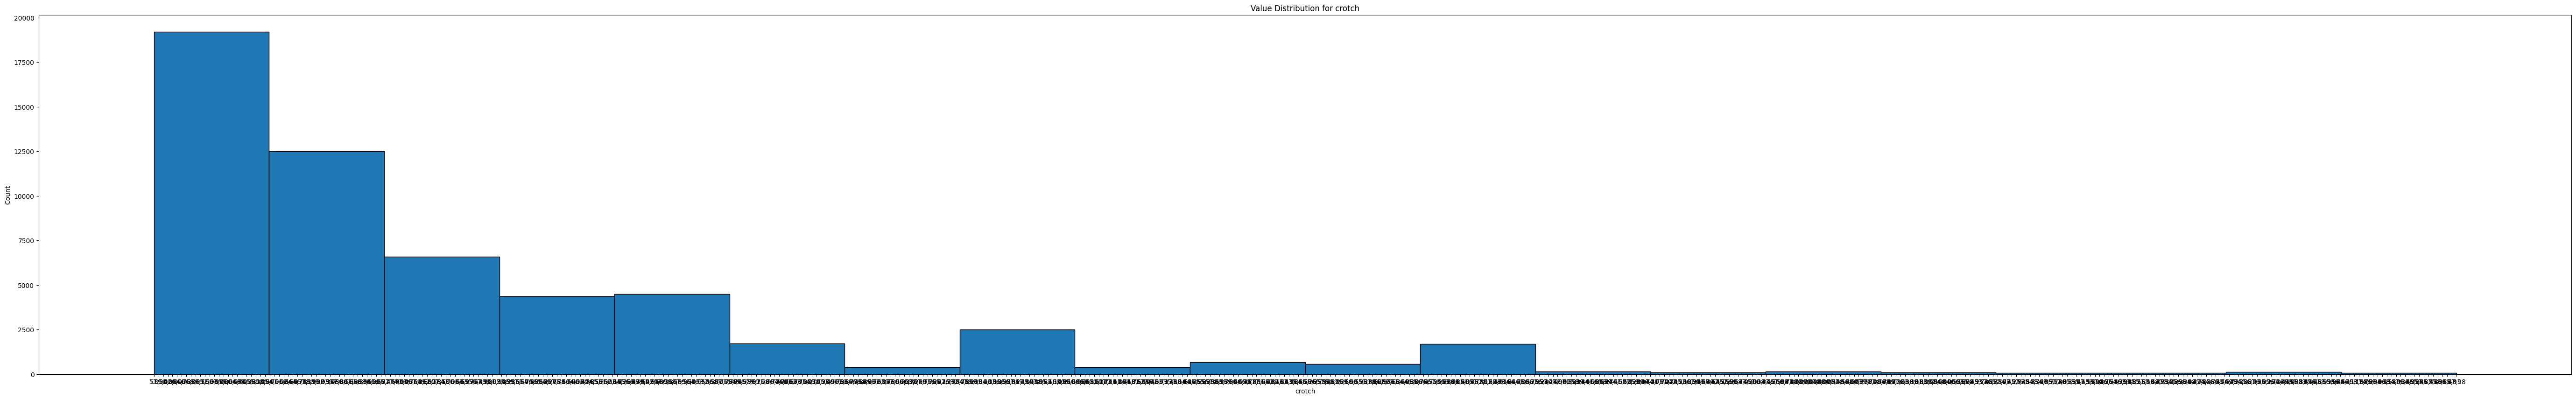

In [7]:
labels = output_columns

# Vẽ histogram cho từng cột
for label in labels:
    fig, ax = plt.subplots(figsize=(70, 10))

    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=20, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

# PROCESSED DATA

- Filled Null
- Used IQR to remove outliers
- One hot encoded form to fit model

In [8]:
df = pd.read_csv(Path(r"..\..\data\processed\no_split.csv").resolve())

In [9]:
df.describe()

,height,weight,age,form_Inverted_Triangle,form_Rectangle,form_Round,form_Trapezoid,form_Triangle,shoulder,long_sleeve,...,biceps,armhole,neck,chest,waist,stomach,hip,pants_length,thight,crotch
count,55878.000000,55878.000000,55878.000000,55878.000000,55878.000000,55878.000000,55878.000000,55878.000000,55878.000000,55878.000000,...,55878.000000,55878.000000,55878.000000,55878.000000,55878.000000,55878.000000,55878.000000,55878.000000,55878.000000,55878.000000
mean,169.416837,68.261964,33.263538,0.211156,0.037063,0.163195,0.272701,0.315885,44.809048,69.492018,...,33.595351,46.286821,40.889939,97.913204,87.103225,85.528186,96.794338,94.833512,58.835087,62.648413
std,6.762136,11.338121,11.769094,0.408133,0.188918,0.369547,0.445352,0.464871,2.612251,4.356088,...,3.396812,3.684237,2.249753,7.531508,9.442620,8.306443,7.181449,4.809323,4.595898,3.973314
min,110.000000,20.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,44.000000,...,21.000000,28.000000,26.000000,53.000000,43.000000,44.000000,47.000000,59.000000,34.000000,41.000000
25%,165.000000,60.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,67.000000,...,31.000000,44.000000,40.000000,93.000000,81.000000,80.000000,92.000000,92.000000,56.000000,60.000000
50%,170.000000,67.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,70.000000,...,33.000000,46.000000,41.000000,98.000000,86.000000,85.000000,97.000000,95.000000,59.000000,62.000000
75%,173.000000,74.000000,44.000000,0.000000,0.000000,0.000000,1.000000,1.000000,46.000000,73.000000,...,36.000000,49.000000,42.000000,102.000000,93.000000,90.000000,101.000000,98.000000,61.000000,65.000000
max,205.000000,170.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,58.000000,84.000000,...,61.000000,61.000000,55.000000,155.000000,156.000000,139.000000,146.000000,139.000000,86.000000,90.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55878 entries, 0 to 55877
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   height                  55878 non-null  int64
 1   weight                  55878 non-null  int64
 2   age                     55878 non-null  int64
 3   form_Inverted_Triangle  55878 non-null  int64
 4   form_Rectangle          55878 non-null  int64
 5   form_Round              55878 non-null  int64
 6   form_Trapezoid          55878 non-null  int64
 7   form_Triangle           55878 non-null  int64
 8   shoulder                55878 non-null  int64
 9   long_sleeve             55878 non-null  int64
 10  sleeve                  55878 non-null  int64
 11  biceps                  55878 non-null  int64
 12  armhole                 55878 non-null  int64
 13  neck                    55878 non-null  int64
 14  chest                   55878 non-null  int64
 15  waist              

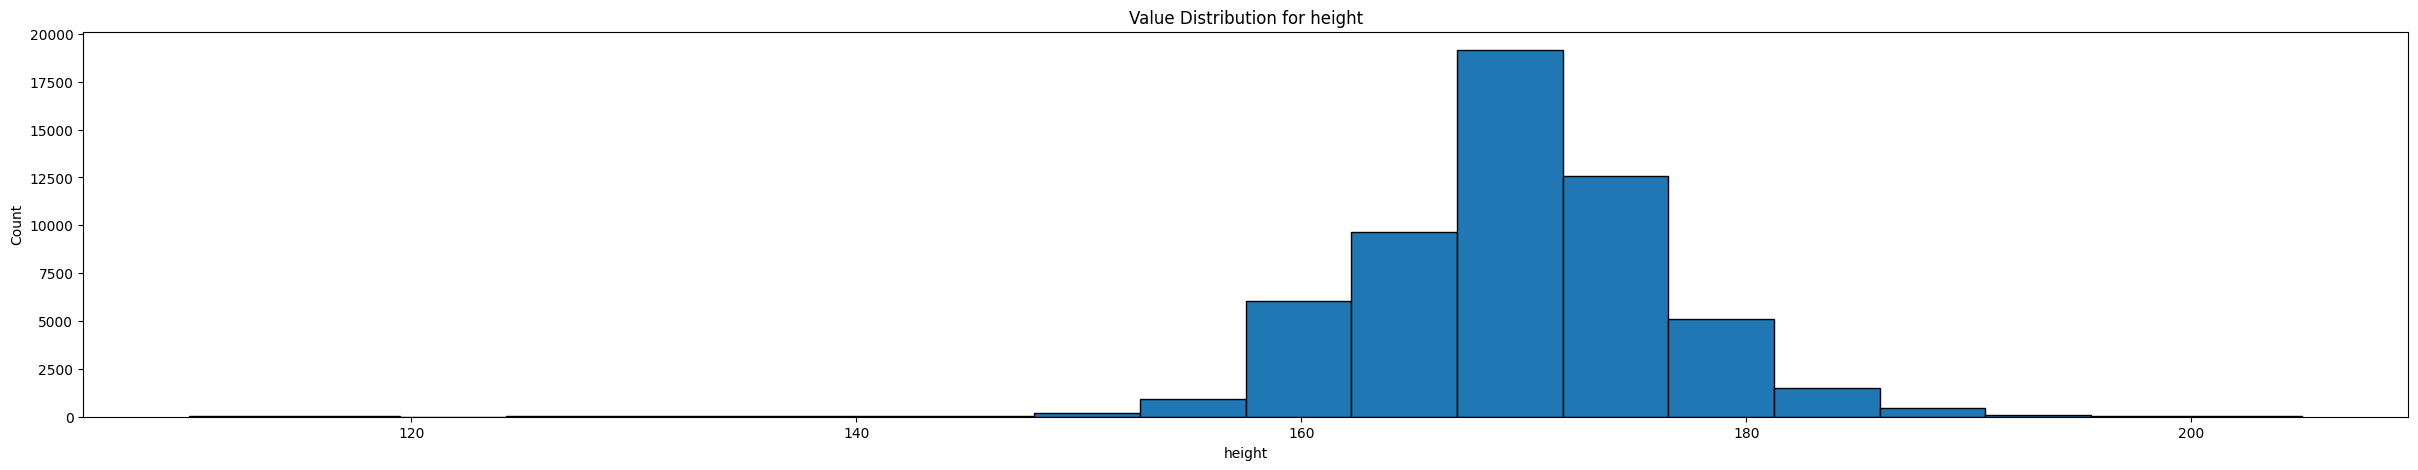

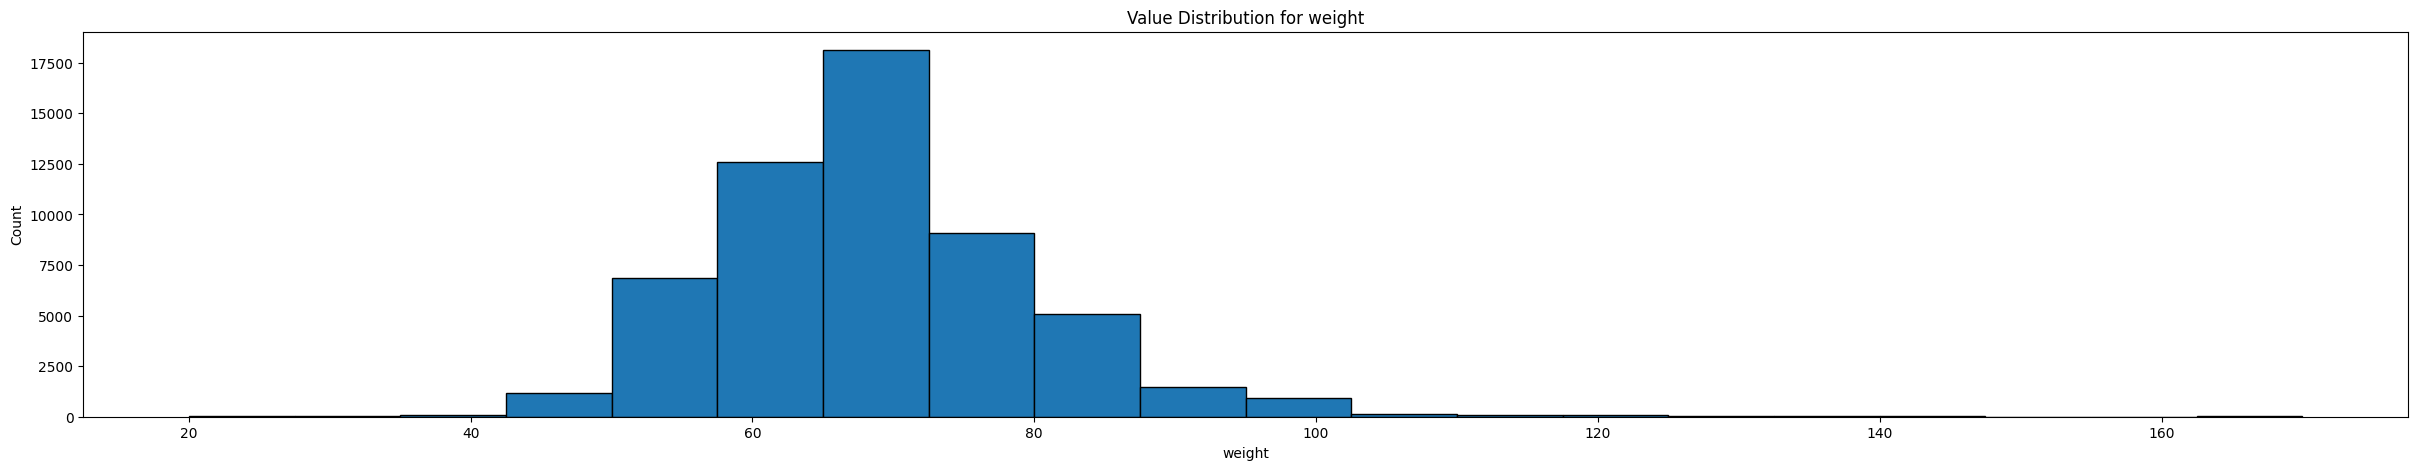

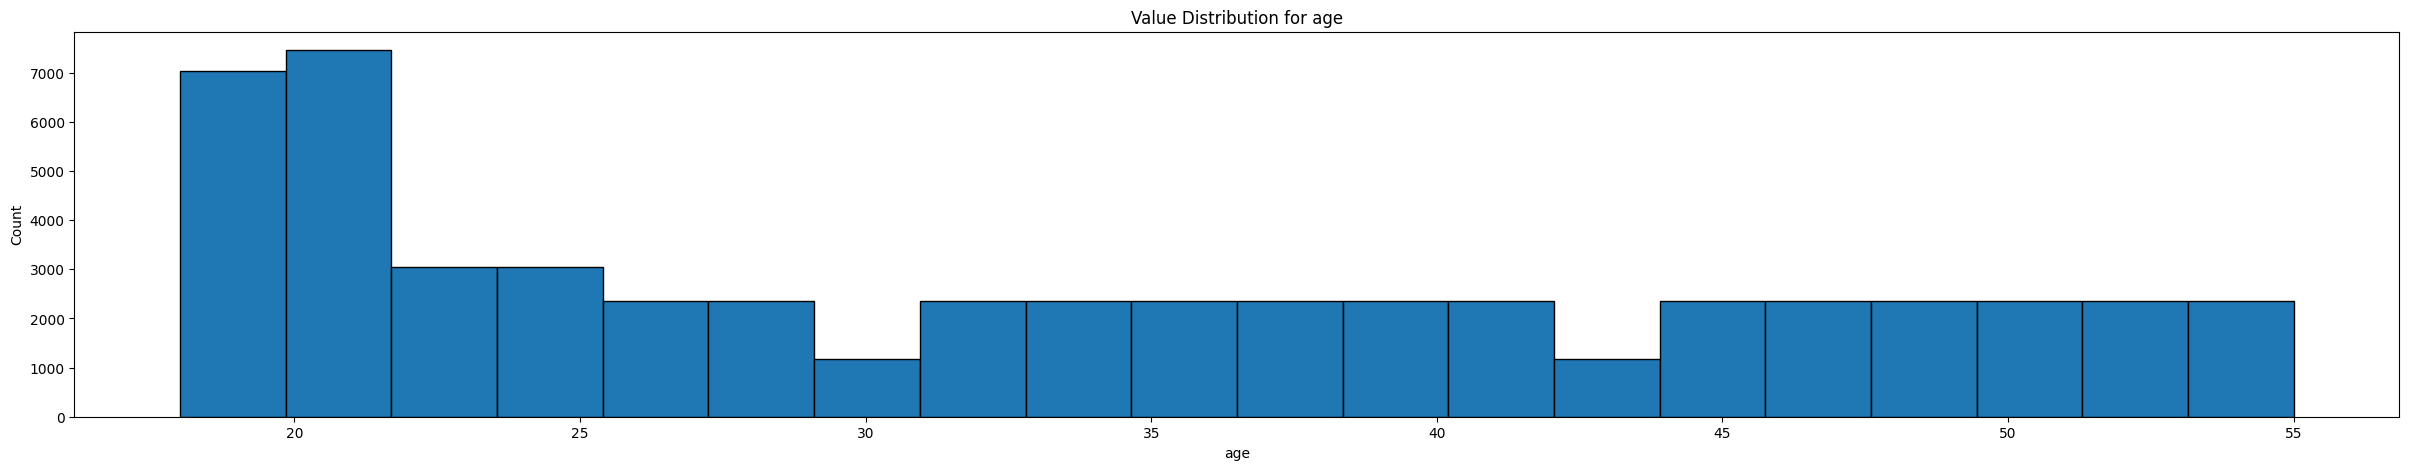

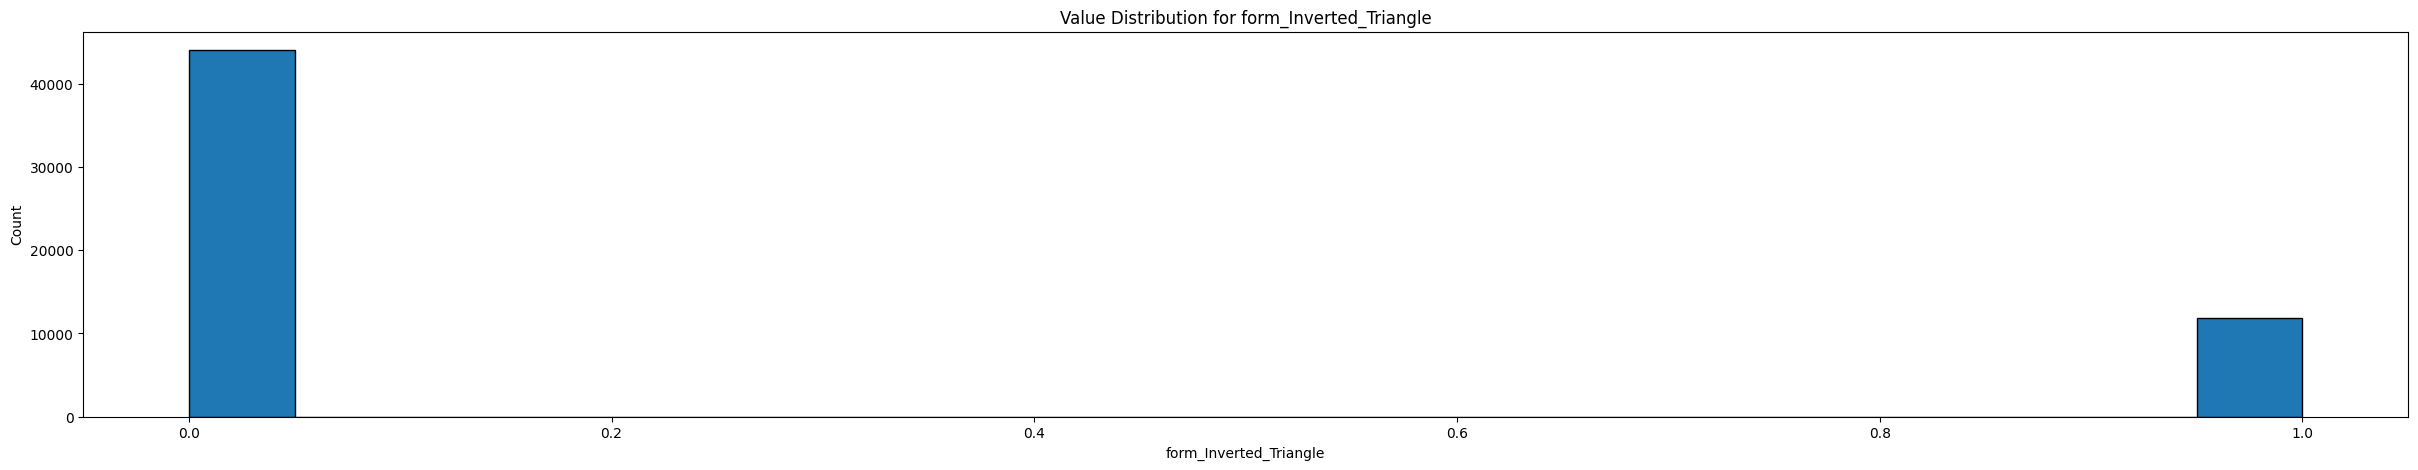

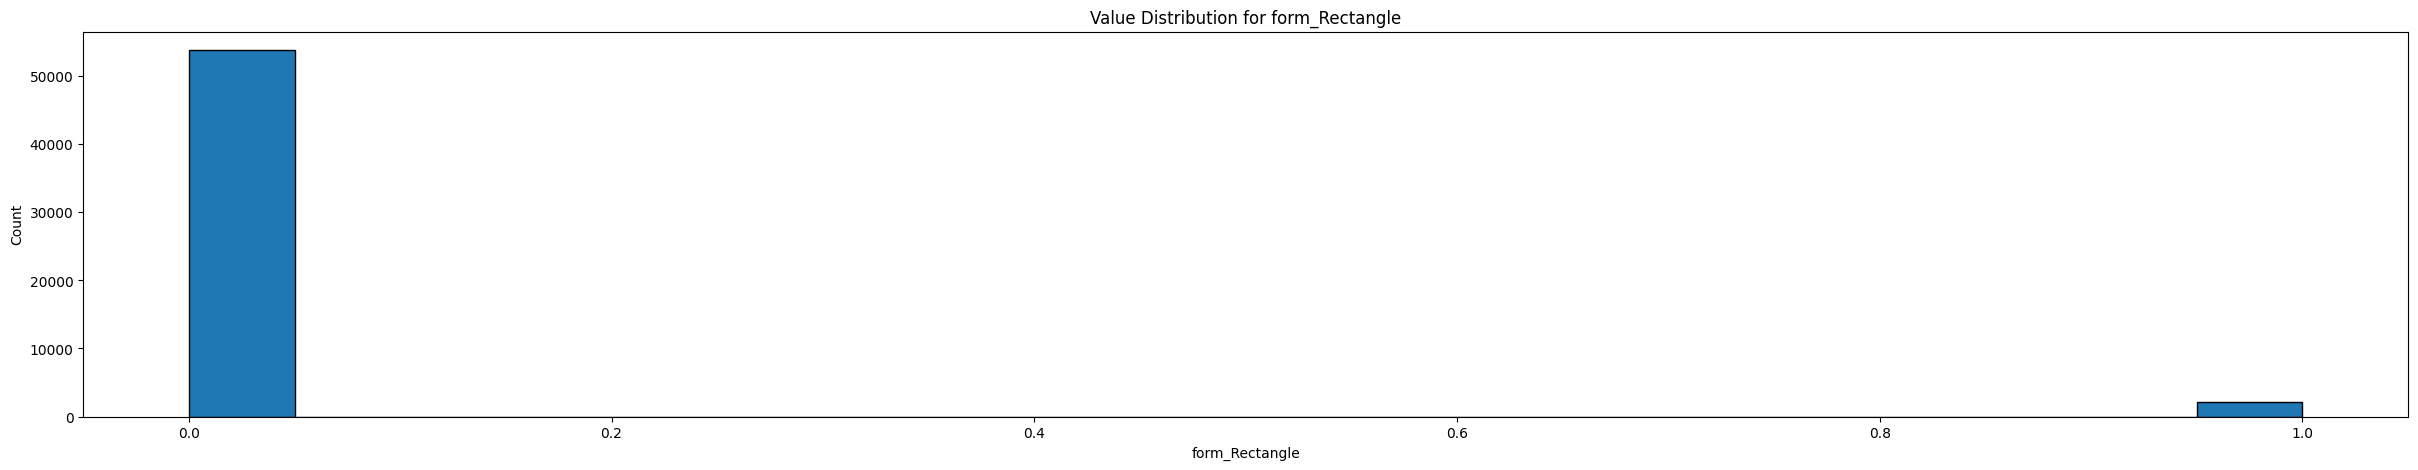

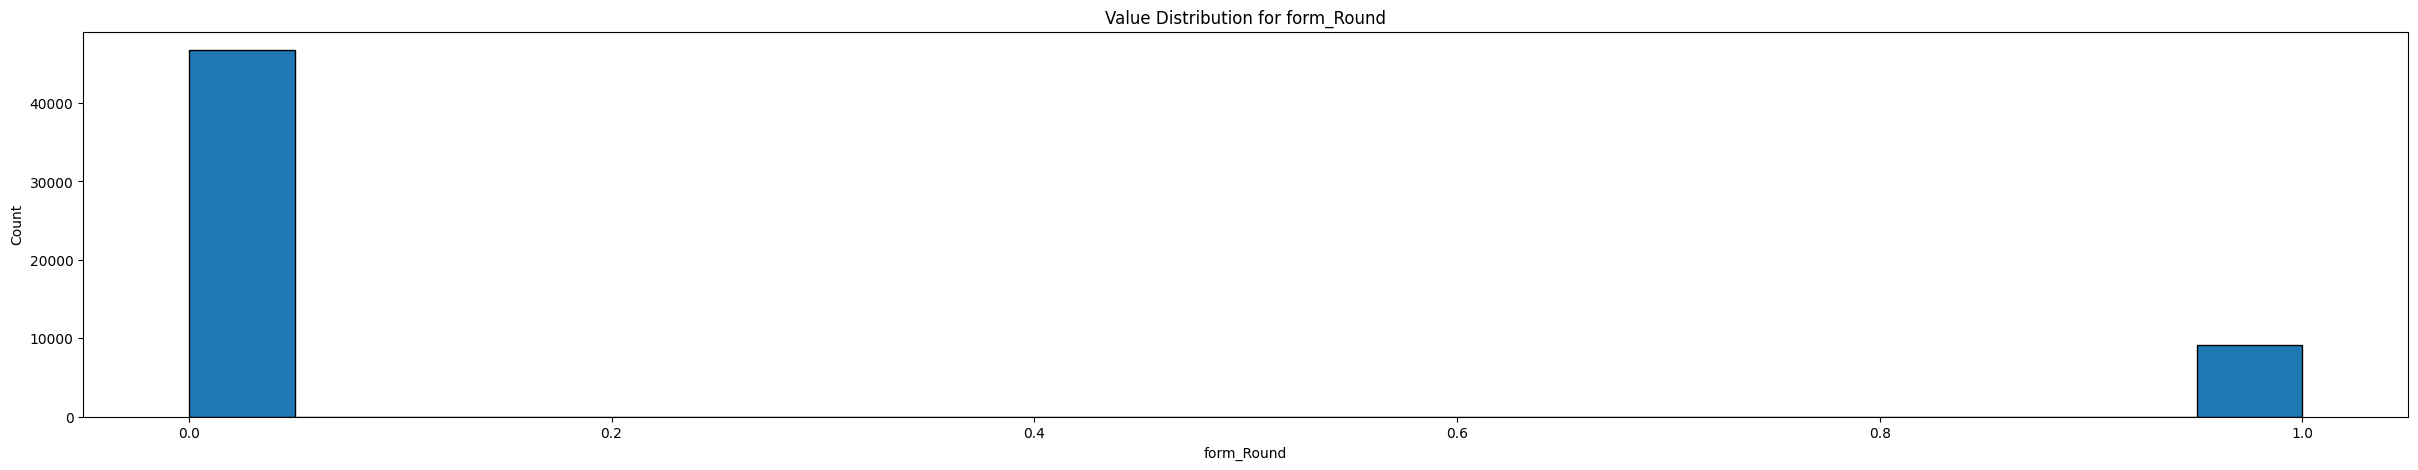

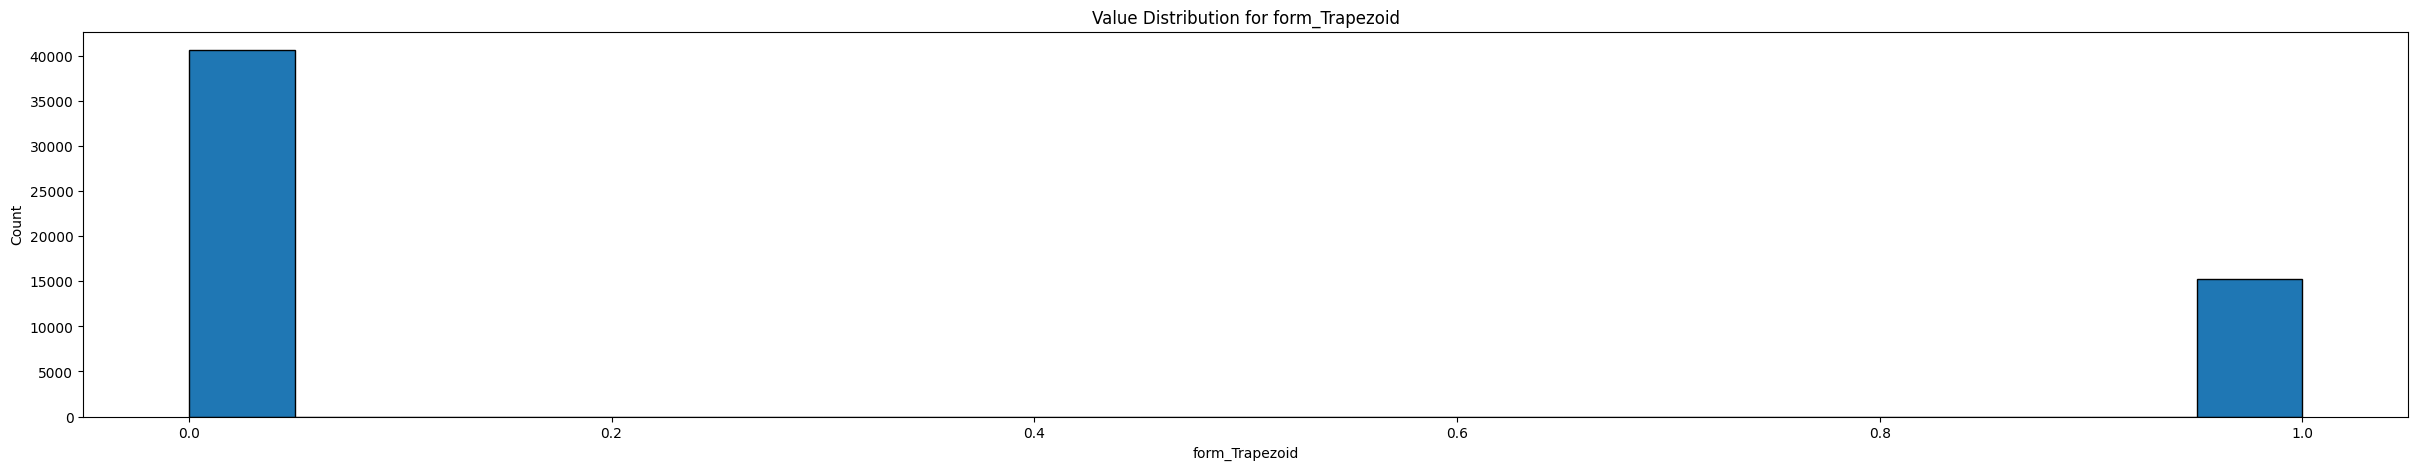

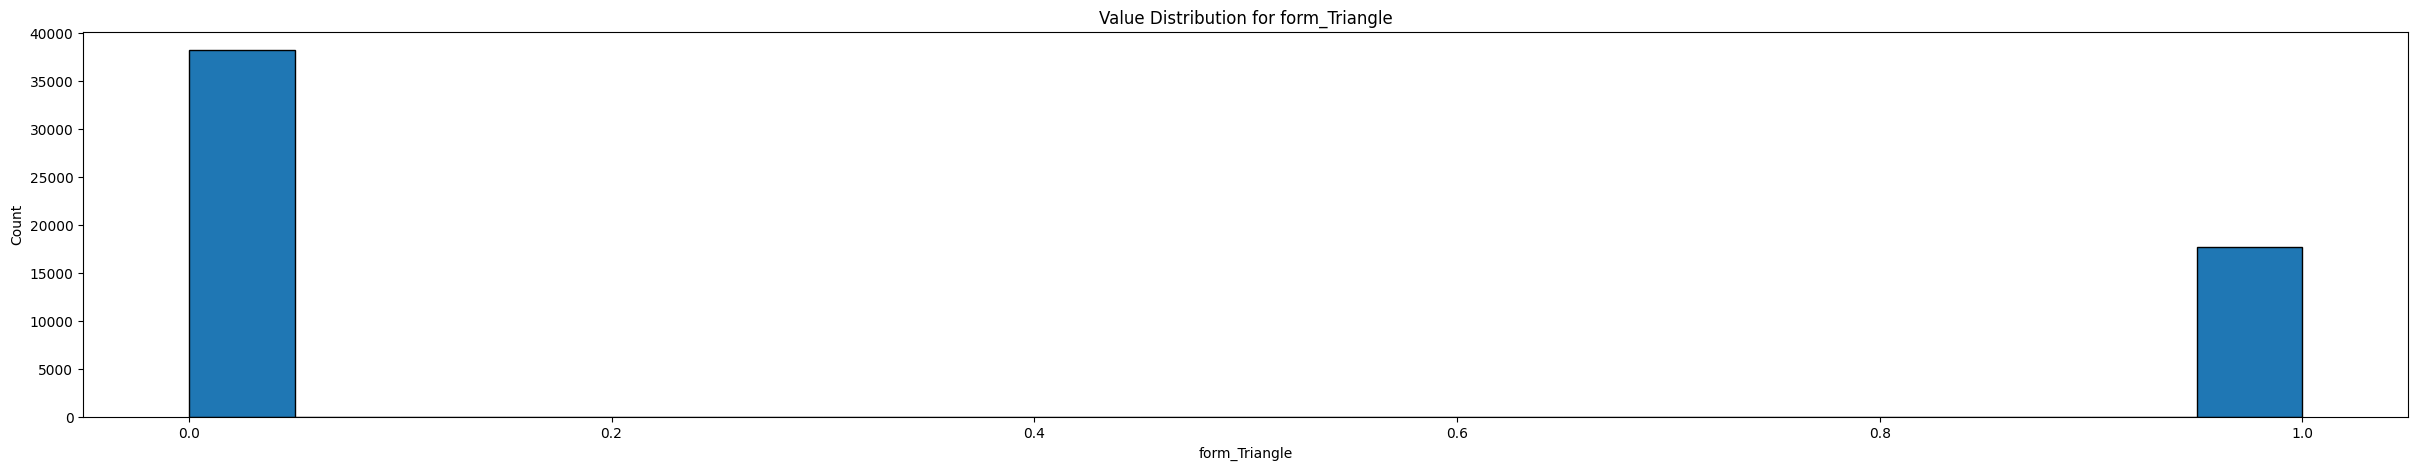

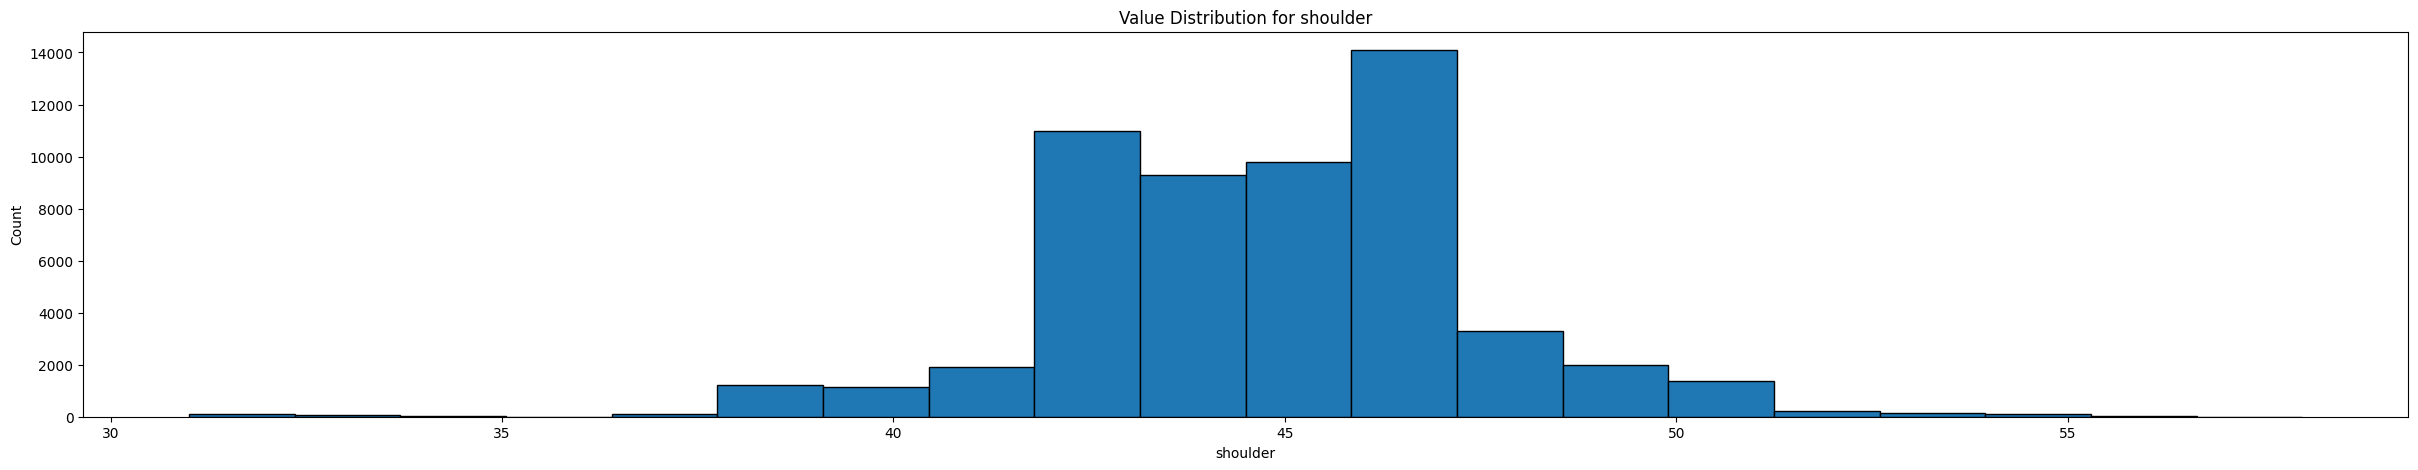

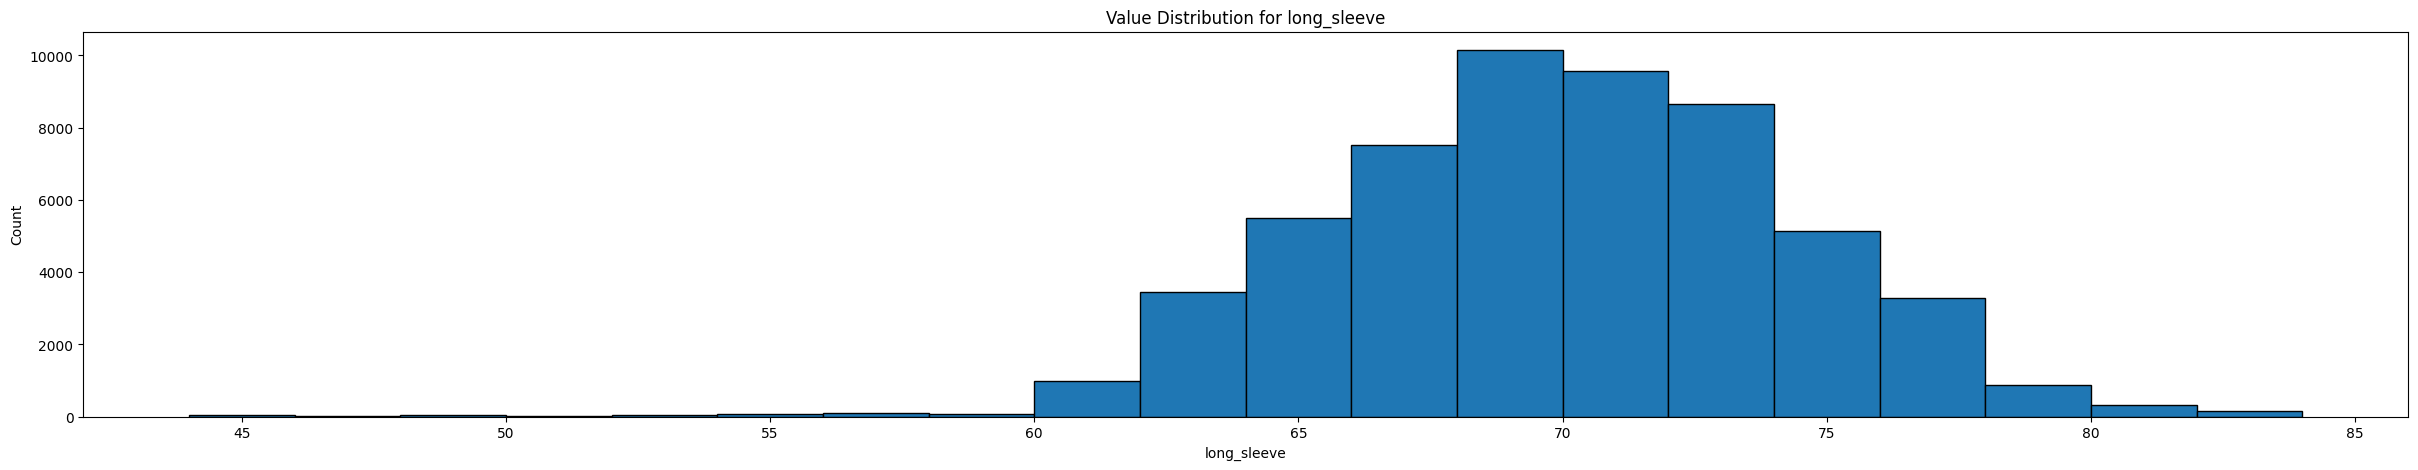

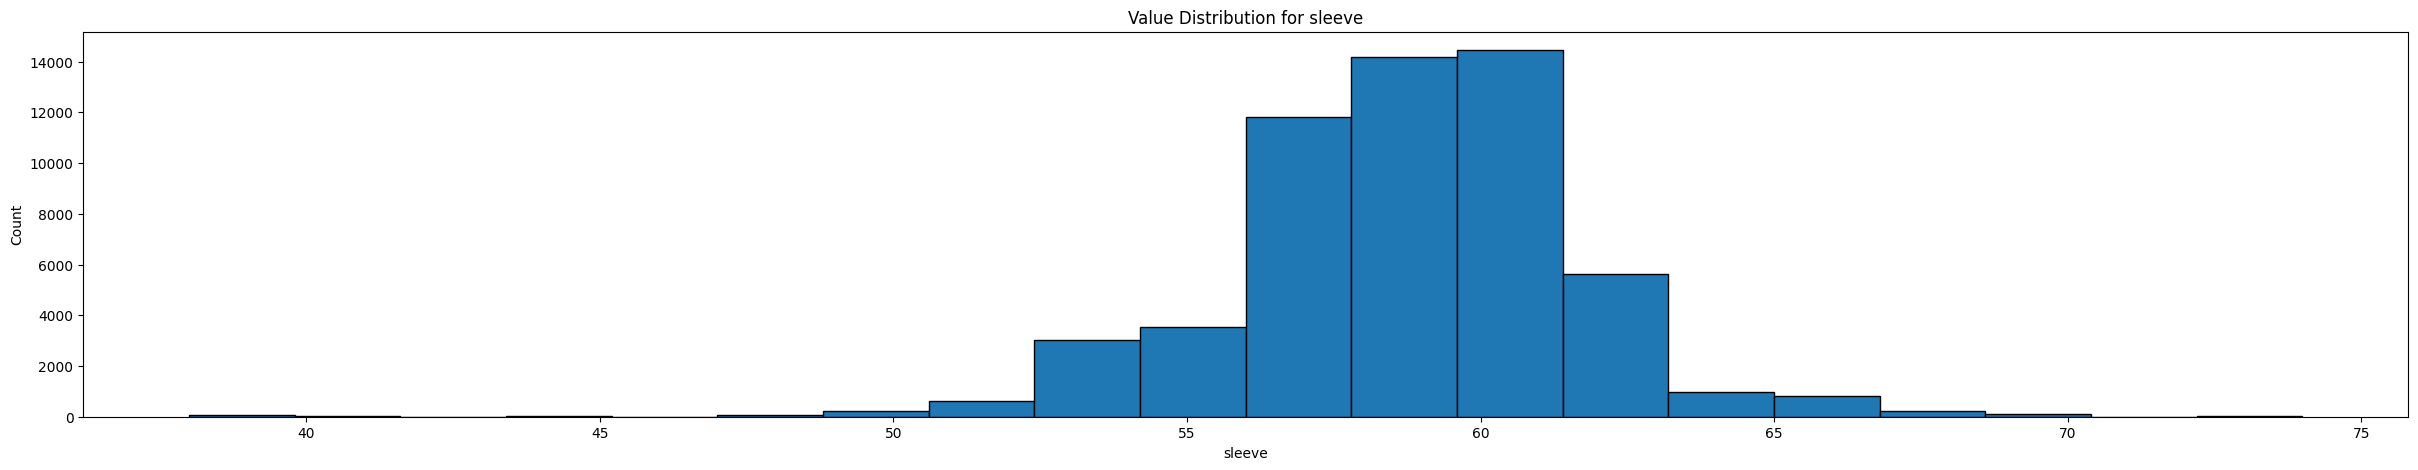

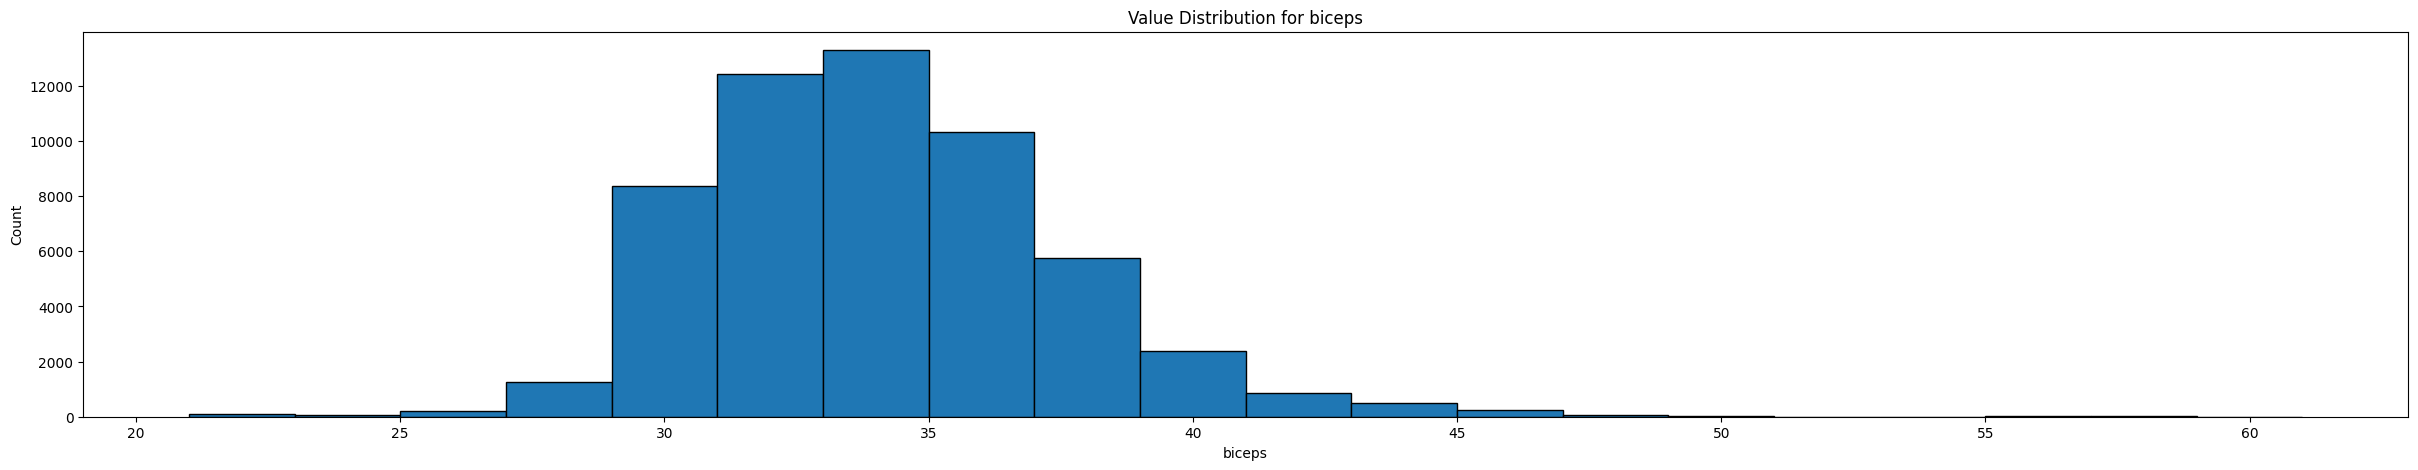

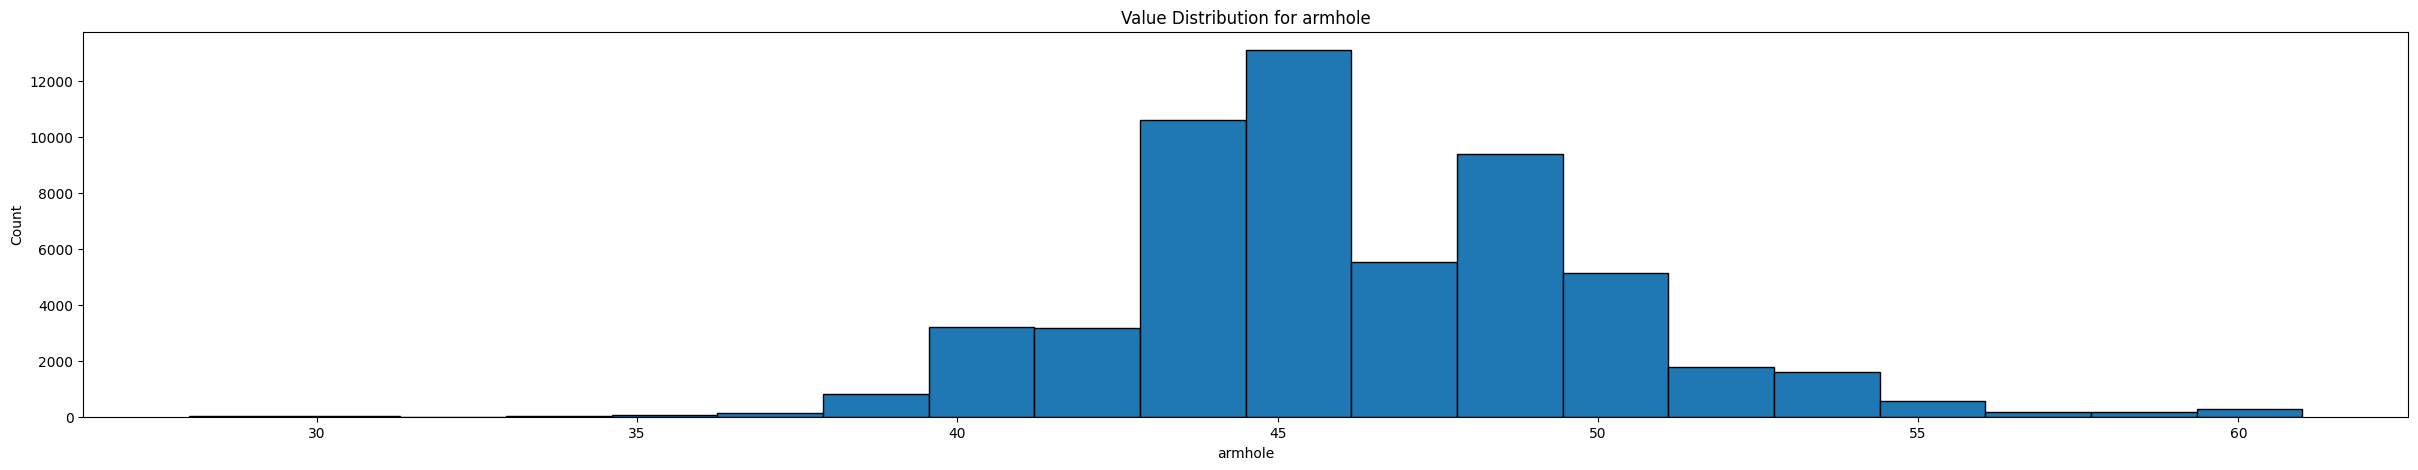

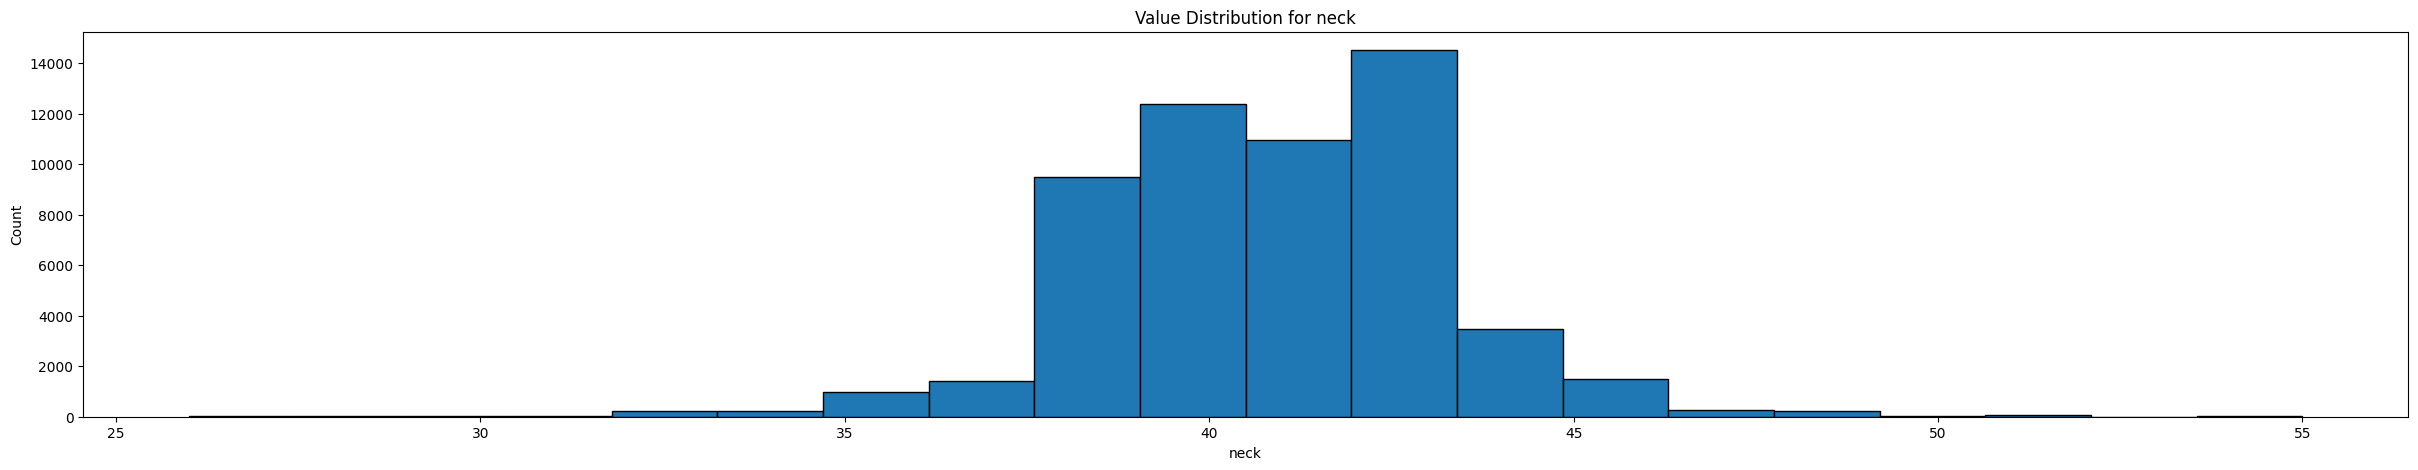

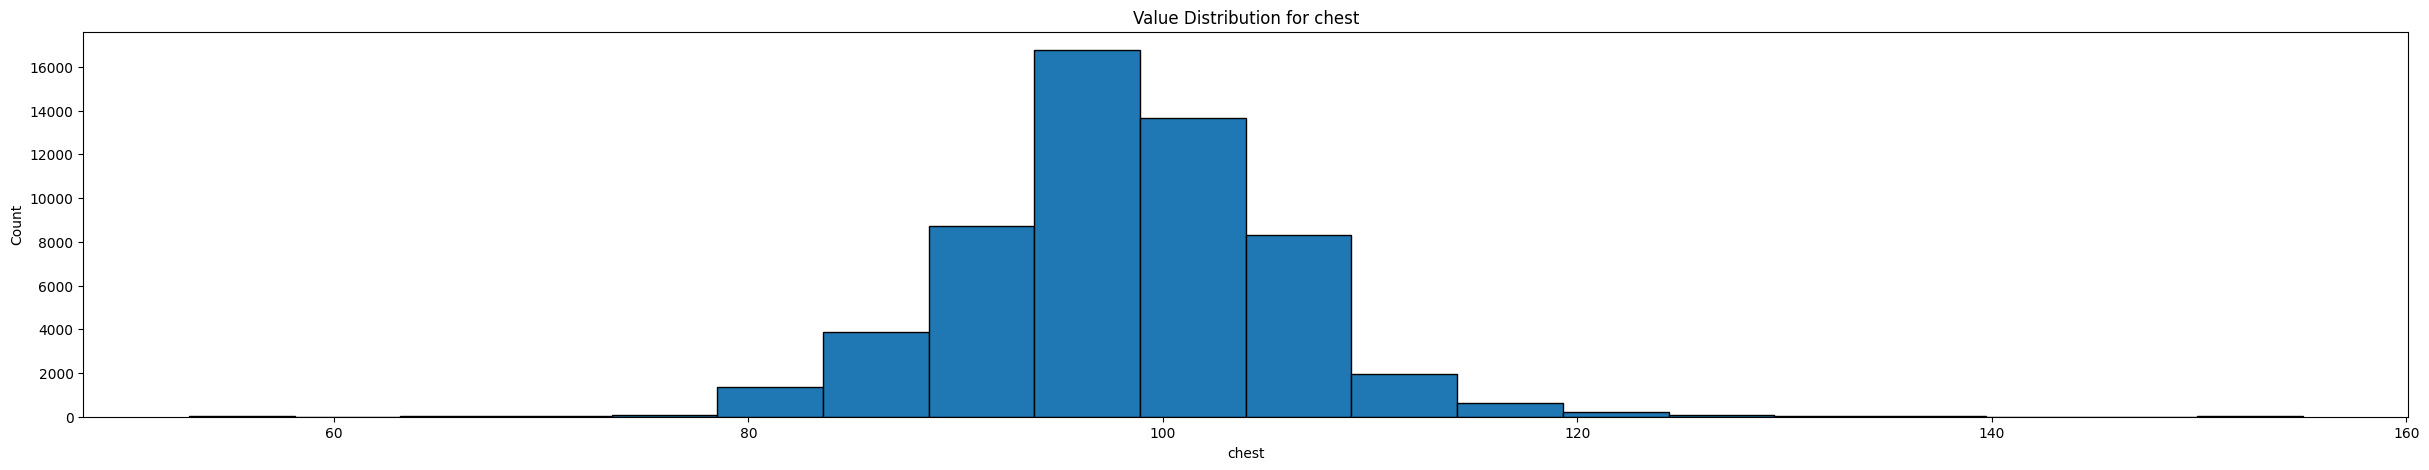

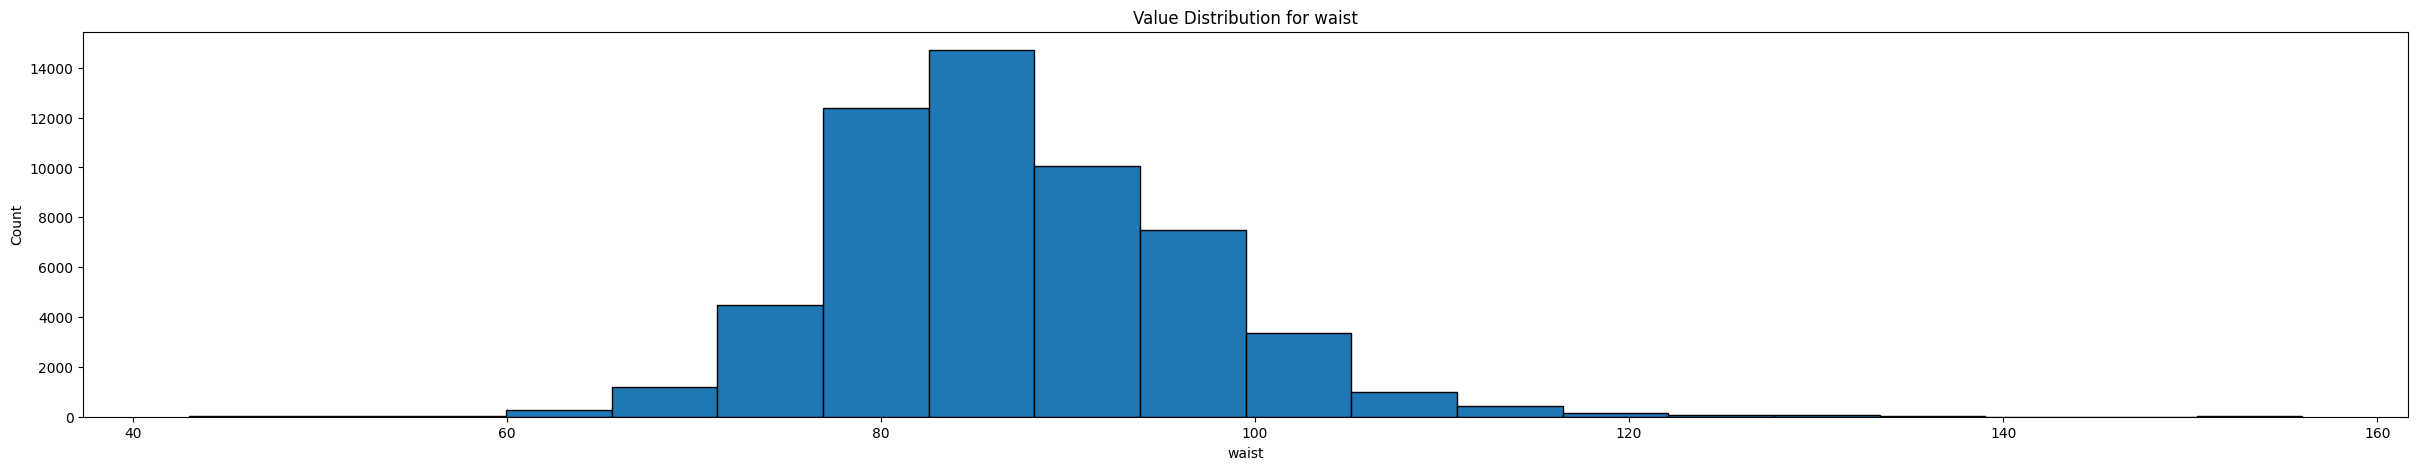

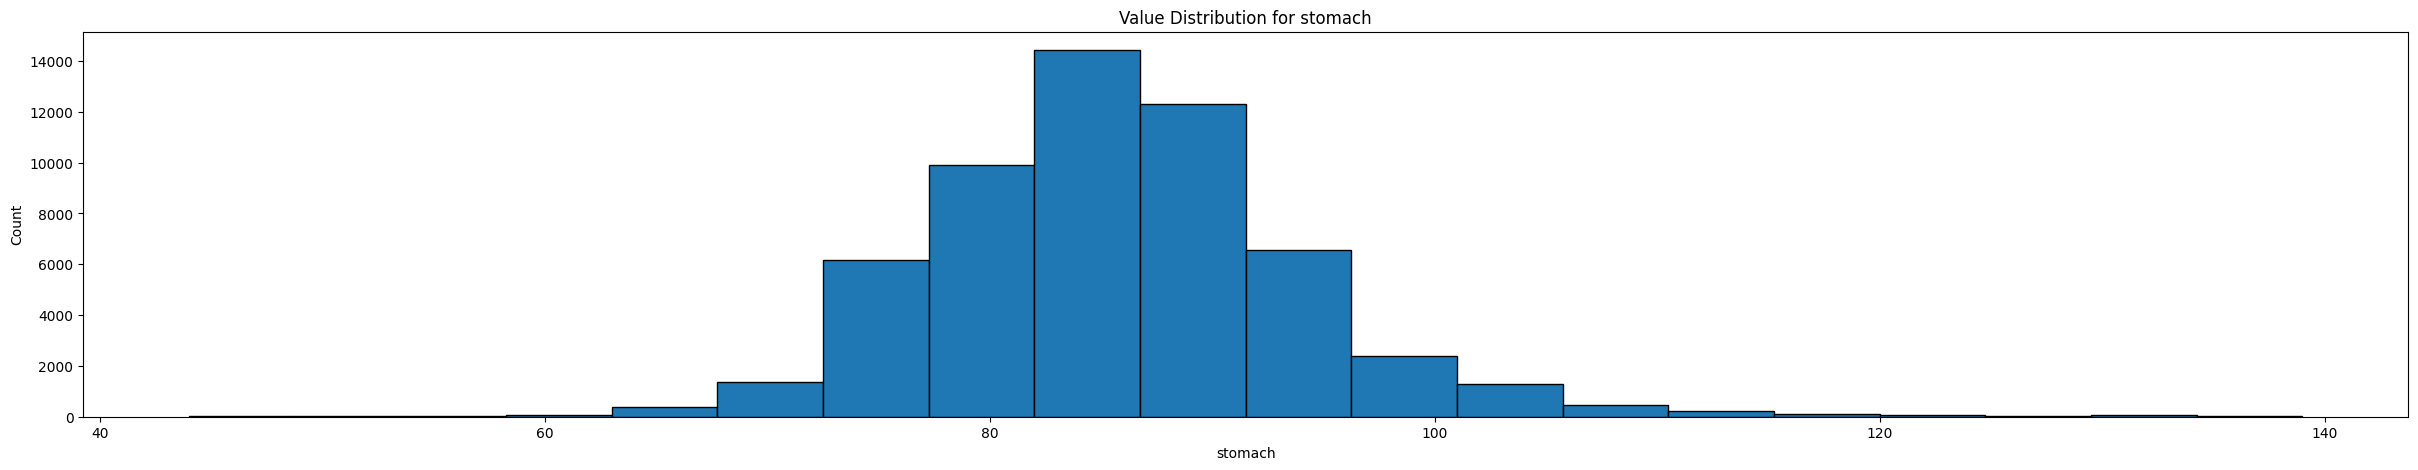

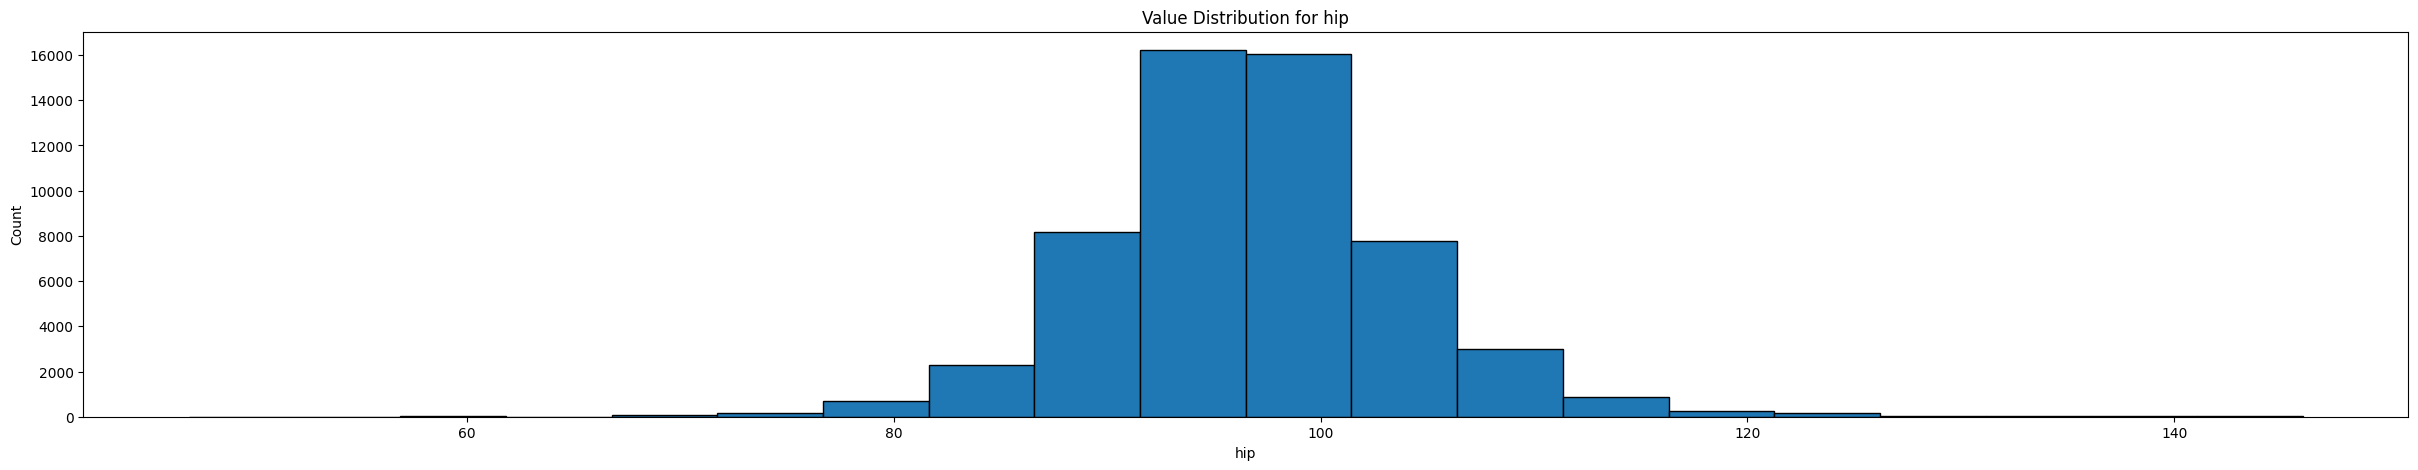

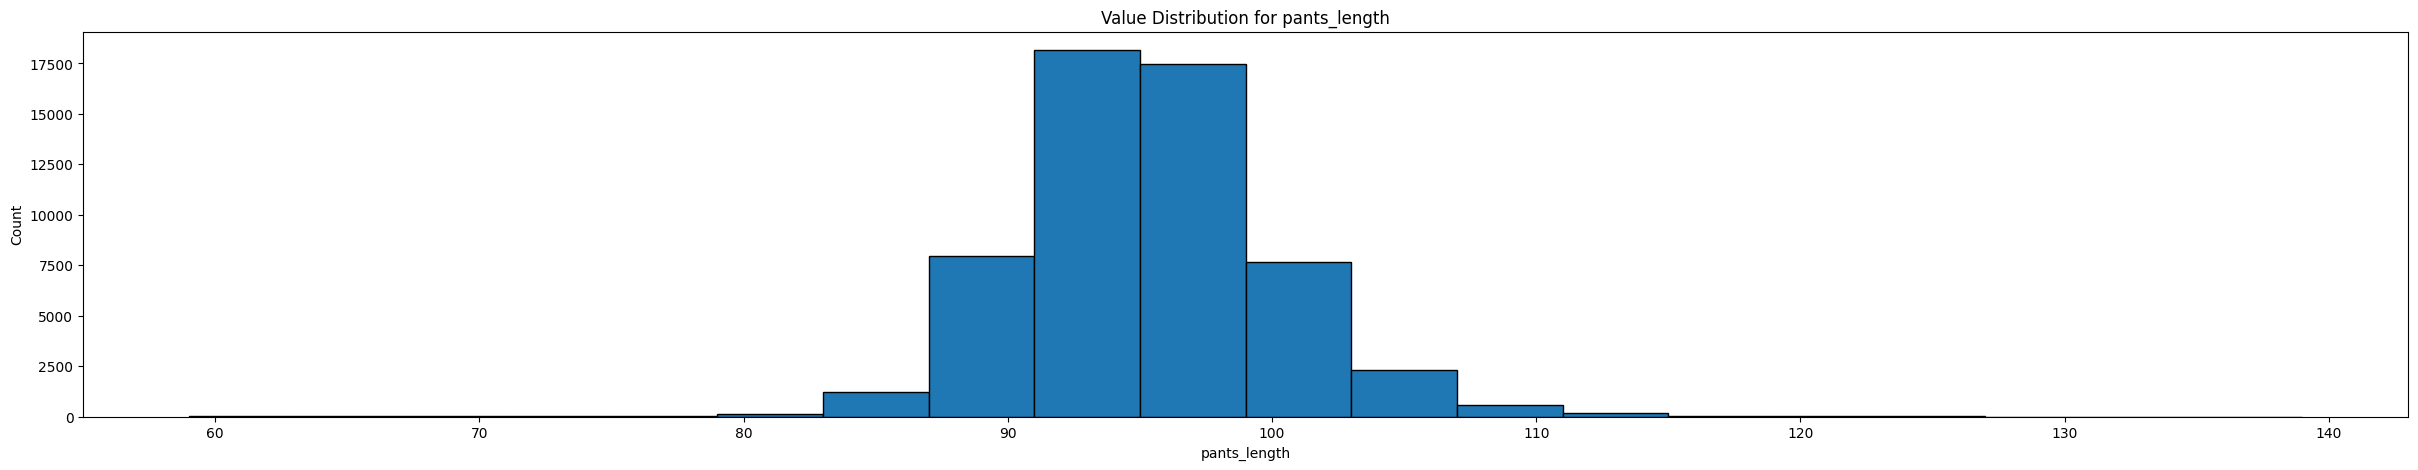

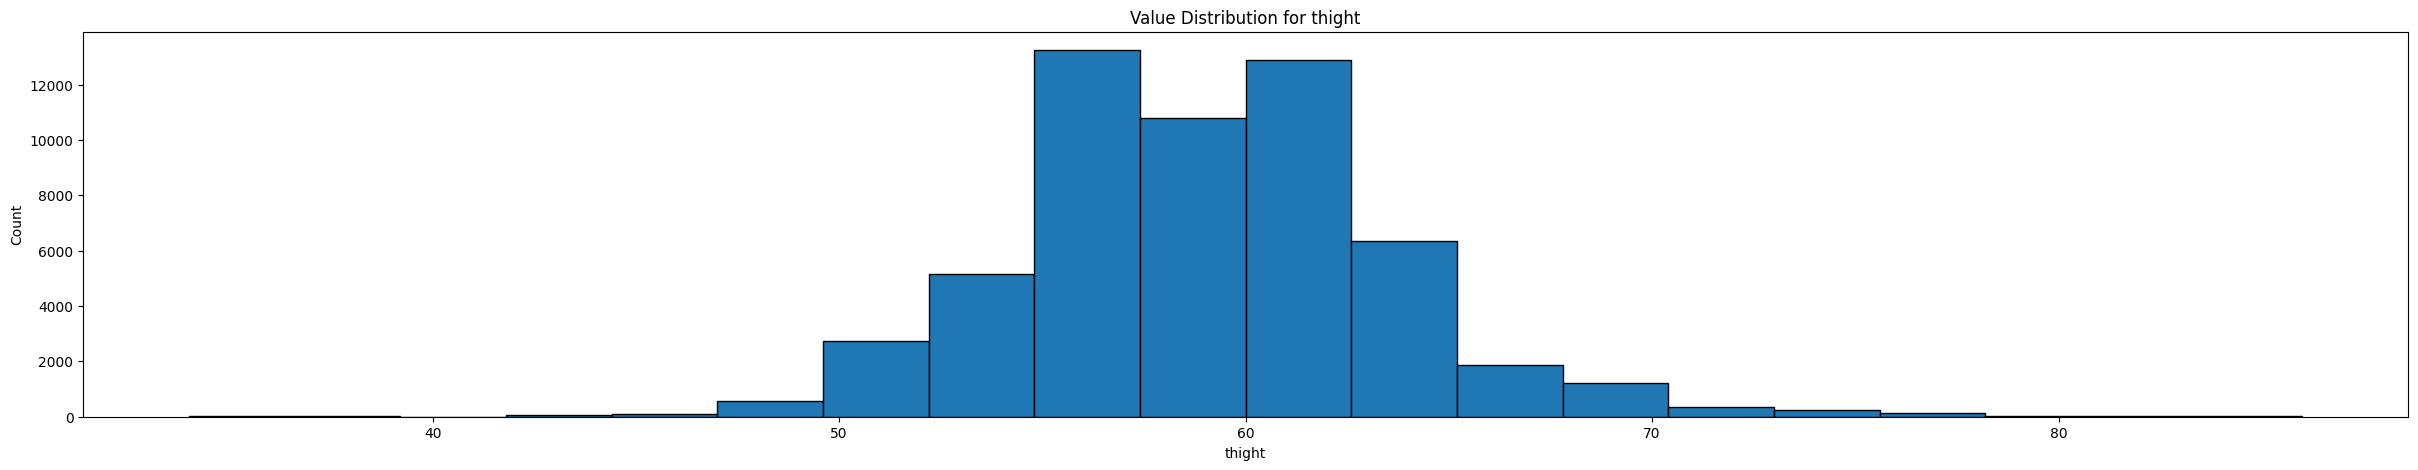

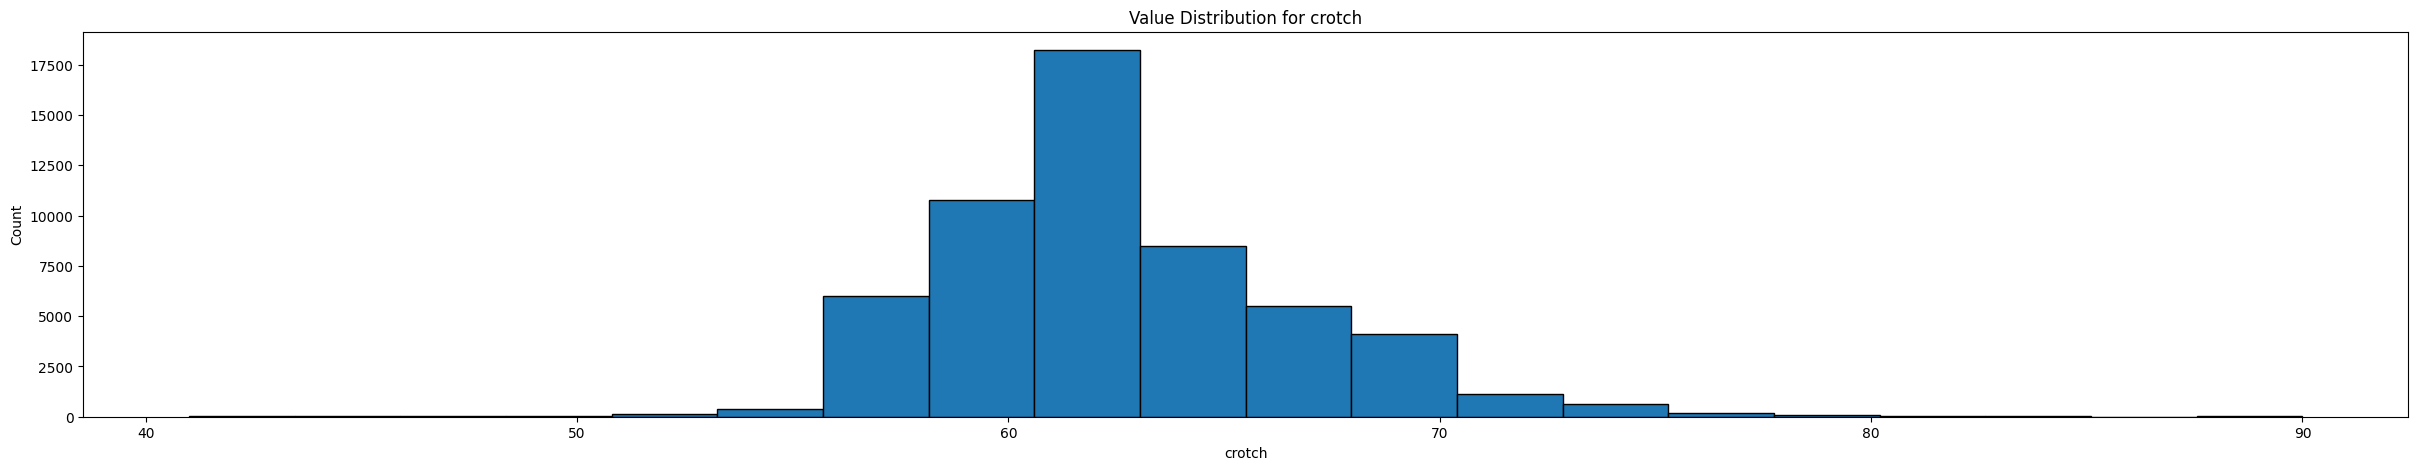

In [11]:
# Vẽ histogram cho từng cột
for label in df.columns:
    fig, ax = plt.subplots(figsize=(30, 5))

    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=20, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

# CORRELATION MATRIX

In [14]:
import seaborn as sns

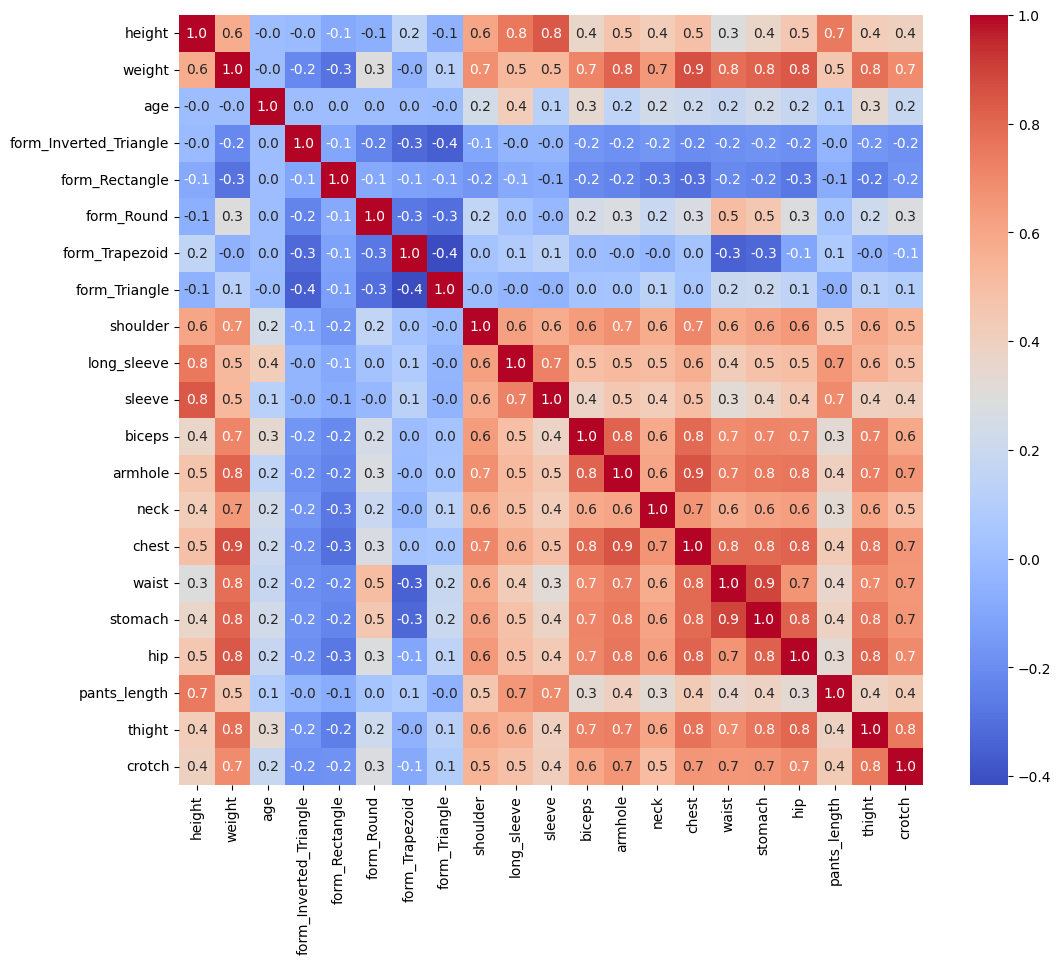

In [18]:
plt.figure(figsize=(12, 10)) 
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap="coolwarm")

plt.show()

# ANALYTICS

- Ngoài các trường dữ liệu rời rạc, tất cả các trường dữ liệu khác như height, weight, bicep... đều có liên hệ tương quan chặt chẽ với nhau. Các cặp giá trị này thay đổi cùng chiều (tương quan giá trị gần 1)
- Các giá trị trong bộ dữ liệu cho thấy chúng có liên hệ với nhau, do vậy sử dụng mô hình học máy Linear Regression để dự đoán giá trị số đo
- Vì sử dụng mô hình học máy Linear Regression, các giá trị trong trường form được one hot encoding trở thành các cột riêng với giá trị rời rạc (0, 1) nhằm tăng sự khác biệt giữa các dữ liệu với các form khác nhau thay vì label encoding giá trị số
